# Featurization and Model Tuning Project

#### (Naveen Pete, PGP-AIML Online August 20-A)

## Data Description

The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory. Data is in raw form (not scaled). The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).

## Domain
Cement manufacturing

## Context
Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.

## Attribute Information
- Cement: measured in kg in a m3 mixture
- Blast: measured in kg in a m3 mixture
- Fly ash: measured in kg in a m3 mixture
- Water: measured in kg in a m3 mixture
- Superplasticizer: measured in kg in a m3 mixture
- Coarse Aggregate: measured in kg in a m3 mixture
- Fine Aggregate: measured in kg in a m3 mixture
- Age: day (1~365)
- Concrete compressive strength measured in MPa

## Learning Outcomes
- Exploratory Data Analysis
- Building ML models for regression
- Hyper parameter tuning

## Objective
Modeling of strength of high performance concrete using Machine Learning

### Import necessary libraries

In [2]:
# Libraries needed for scientific computation, data analysis and manipulation
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

# Libraries needed for statistical data visualization
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

### Load the dataset

In [3]:
# Initialize dataframe with Concrete dataset
main_df = pd.read_csv("concrete.csv")

### Profile the dataset

In [4]:
profile = ProfileReport(main_df, title="Pandas Profiling Report")
profile.to_file("fmt-dataset-report.html")

In [5]:
profile.to_widgets()
# profile.to_notebook_iframe()

## 1. Deliverable - 1 (Exploratory data quality report reflecting the following) (20 marks)

### (a) Univariate analysis (5 marks)
#### Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers

### Get a feel of the data

In [6]:
main_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [7]:
main_df.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


### Count number of rows (records) & columns (attributes or features) in the dataset

In [8]:
row_count, column_count = main_df.shape

print(f'No. of rows: {row_count}')
print(f'No. of columns: {column_count}')

No. of rows: 1030
No. of columns: 9


### Understand the structure of the dataset and the type of attributes within it 

In [9]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [10]:
main_df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

**Observations**
- There are 1030 rows and 9 columns in the dataset
- All the columns in the dataset are numerical
- 'strength' column seems to be the target variable

### Check the presence of null and zero(0) values

In [11]:
main_df.isnull().apply(pd.value_counts)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
False,1030,1030,1030,1030,1030,1030,1030,1030,1030


In [12]:
main_df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [13]:
# function to print and return column names that contain null values
def get_columns_with_null_values(df):
    print('Columns with null values:')
    print('-------------------------')

    columns_with_null_values = []
    ctr = 0
    for col in df.columns:
        null_count = df[col].isnull().sum()
        if null_count > 0:
            columns_with_null_values.append(col)
            ctr = ctr + 1
            print(f'{ctr}. {col} - {null_count}')
            
    return columns_with_null_values

# function to print and return column names that contain zero(0) values
def get_columns_with_zero_values(df):
    print('Columns with zero values:')
    print('-------------------------')
    
    columns_with_zero_values = []
    ctr = 0
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type != 'object':
            zero_count = df[main_df[col]==0][col].count()
            if zero_count > 0:
                columns_with_zero_values.append(col)
                ctr = ctr + 1
                print(f'{ctr}. {col} - {zero_count}')
                
    return columns_with_zero_values

# function to impute null values with median value
def impute_null_values(df, columns):
    copied_df = df.copy()
    for col in columns:
        value = copied_df[col].median()
        copied_df[col] = copied_df[col].fillna(value)
    return copied_df

In [14]:
columns_with_null_values = get_columns_with_null_values(main_df)
if len(columns_with_null_values) > 0:
    print('\nColumn names:', columns_with_null_values)
else:
    print('No columns with null values')

Columns with null values:
-------------------------
No columns with null values


In [15]:
columns_with_zero_values = get_columns_with_zero_values(main_df)
if len(columns_with_zero_values) > 0:
    print('\nColumn names:', columns_with_zero_values)
else:
    print('No columns with zero values')

Columns with zero values:
-------------------------
1. slag - 471
2. ash - 566
3. superplastic - 379

Column names: ['slag', 'ash', 'superplastic']


**Observations**
- None of the columns have null values
- 3 columns have zero values - slag, ash, superplastic. For now, I am not treating zeros because I do not have the domain knowledge

### Analyze descriptive statistics of the dataset 
#### Name, Count, Range - min, max, quartiles, Central Values - mean and median 

In [16]:
main_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


### Separate independent and dependent variables

In [17]:
main_df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

In [18]:
# separate independent and dependent variables
independent_features = [
    'cement', 'slag', 'ash', 'water', 
    'superplastic', 'coarseagg', 'fineagg', 'age'
]

dependent_feature = 'strength'

### Common functions required for plotting distribution, boxplot, correlation and identifying correlated columns

In [19]:
# function to plot the distribution of numeric columns 
def plot_distribution(df, columns, bins=20):
    for col in columns:
        sns.displot(data=df, kind='hist', x=col, bins=bins, kde=True)

# function to plot the boxplot distribution of numeric columns 
def plot_boxplot(df, x_column, y_columns):
    plt.figure(figsize=(25, 25))
    
    index = 0
    for col in y_columns:
        index = index + 1
        plt.subplot(3, 3, index)
        sns.boxplot(x=x_column, y=col, data=df)
        
# function to plot correlation using a heatmap
def plot_correlation(df):
    corr = df.corr()
    plt.figure(figsize=(15, 15))
    sns.heatmap(corr, annot=True, fmt='.2f')

# function to plot distribution and box plots for a given set of columns
def plot_dist_and_box(df, columns, bins=20):
    for col in columns:
        fig, (g1, g2) = plt.subplots(nrows=1, ncols=2)
        fig.set_size_inches(15, 3)
        sns.histplot(x=df[col], ax=g1, kde=True, bins=bins)
        g1.set_title(f'Distribution: {col}')

        sns.boxplot(x=df[col], ax=g2)
        g2.set_title(f'Box Plot: {col}')
        
# function to return highly correlated columns
def get_corr_features(df, threshold):
    corr_columns = set()
    corr_matrix = df.corr()

    ctr = 0
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            corr_value = corr_matrix.iloc[i, j]
            if corr_value >= threshold:
                col_name_i = corr_matrix.columns[i]
                col_name_j = corr_matrix.columns[j]
                corr_columns.add(col_name_i)
                ctr += 1
                print(f'{ctr}. \'{col_name_i}\' and \'{col_name_j}\' are highly correlated (Correlation value = {corr_value})')
                
    return corr_columns

# function to identify and treat outlier columns. In my case, I am replacing outliers with the Mean value 
# because I observed Median gives rise to new outliers after treatment 
def treat_outliers(df, columns):
    df_copy = df.copy()
    for col in columns:
        q1 = df_copy[col].quantile(0.25)
        q3 = df_copy[col].quantile(0.75)
        iqr = q3 - q1

        low = q1 - (1.5 * iqr)
        high = q3 + (1.5 * iqr)

        value = df_copy[col].mean()
        df_copy.loc[ (df_copy[col] < low) | (df_copy[col] > high), col] = value
        
    return df_copy

### Plot distribution and outliers within independent columns

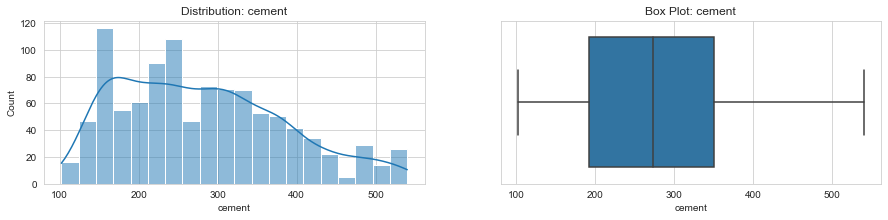

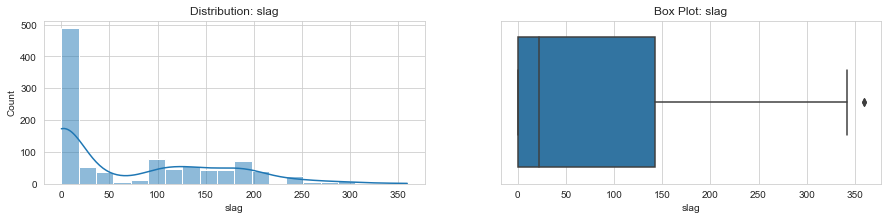

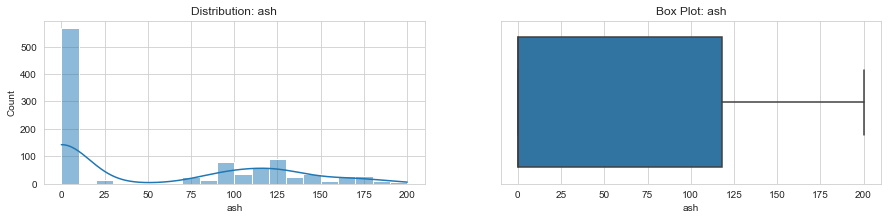

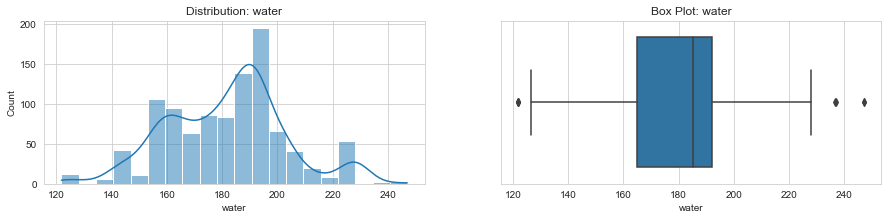

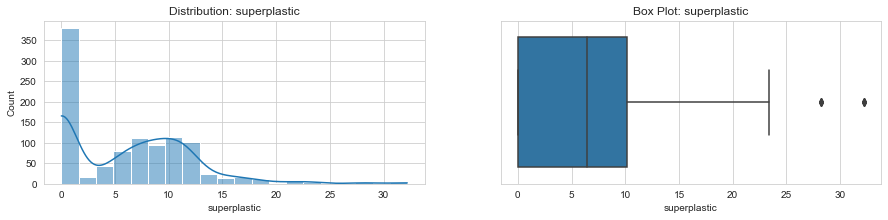

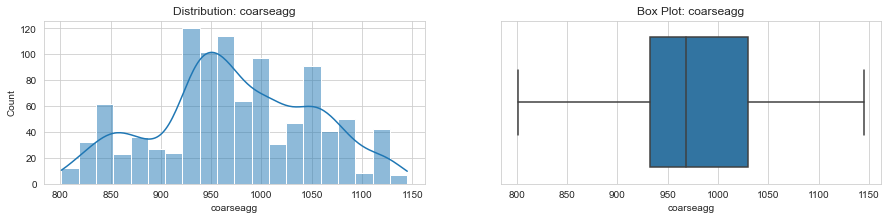

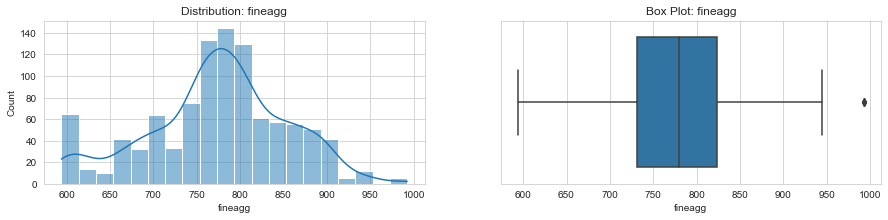

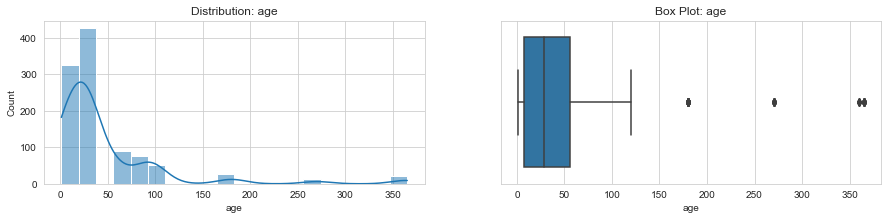

In [20]:
plot_dist_and_box(main_df, independent_features)

**Observations**
- Summary of observations given below:
    1. cement - approximately normally distributed, no outliers
    1. slag - has 3 gaussians, is right skewed, has outliers
    1. ash - has 2 gaussians, is right skewed, no outliers
    1. water - approximately normally distributed, has 3 gaussians, has outliers
    1. superplastic - has 2 gaussians, is right skewed, has outliers
    1. coarseagg - approximately normally distributed, has 3 gaussians, no outliers
    1. fineagg - approximately normally distributed, has 2 gaussians, has outliers
    1. age - is right skewed, has 4 gaussians, has outliers
- Following columns have outliers:
    1. slag
    1. water
    1. superplastic
    1. fineagg
    1. age

### Plot Target column distribution

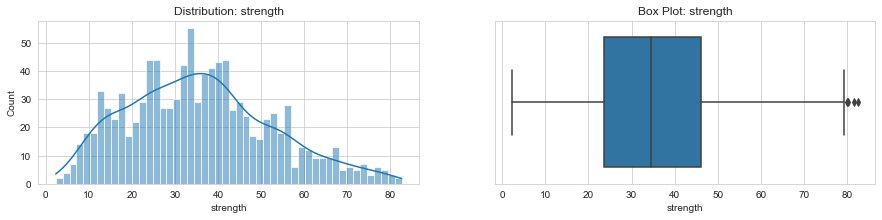

In [21]:
plot_dist_and_box(main_df, [dependent_feature], 50)

**Observations**
- Target column distribution is approximately normal, slightly right-skewed, has outliers

### (b) Multivariate analysis (5 marks)
#### Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Presence of leverage points. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes

### Study the correlation between independent columns

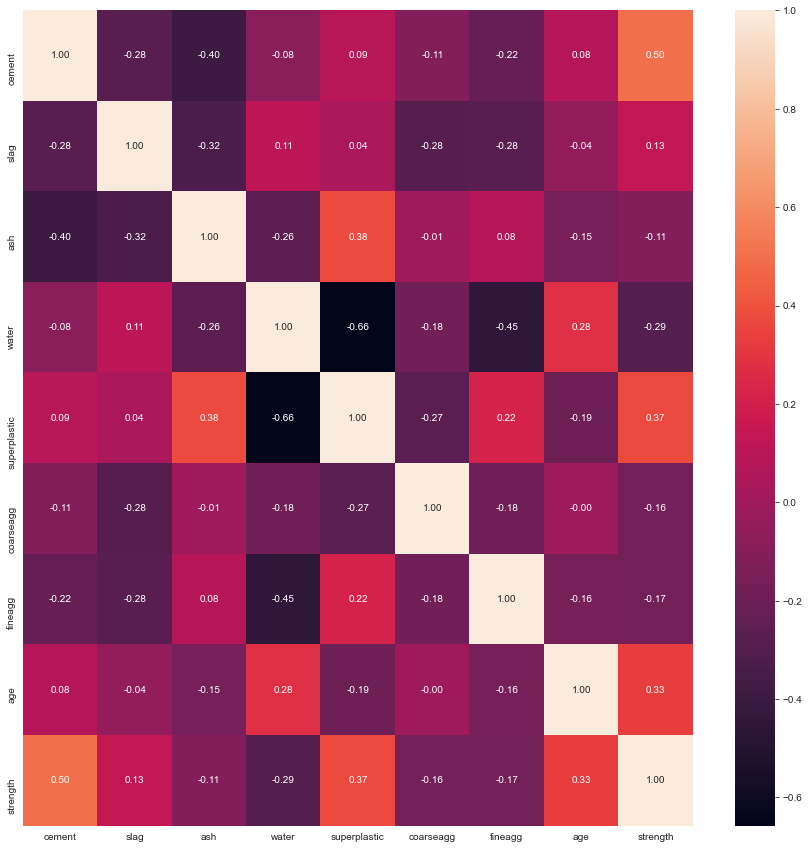

In [22]:
plot_correlation(main_df)

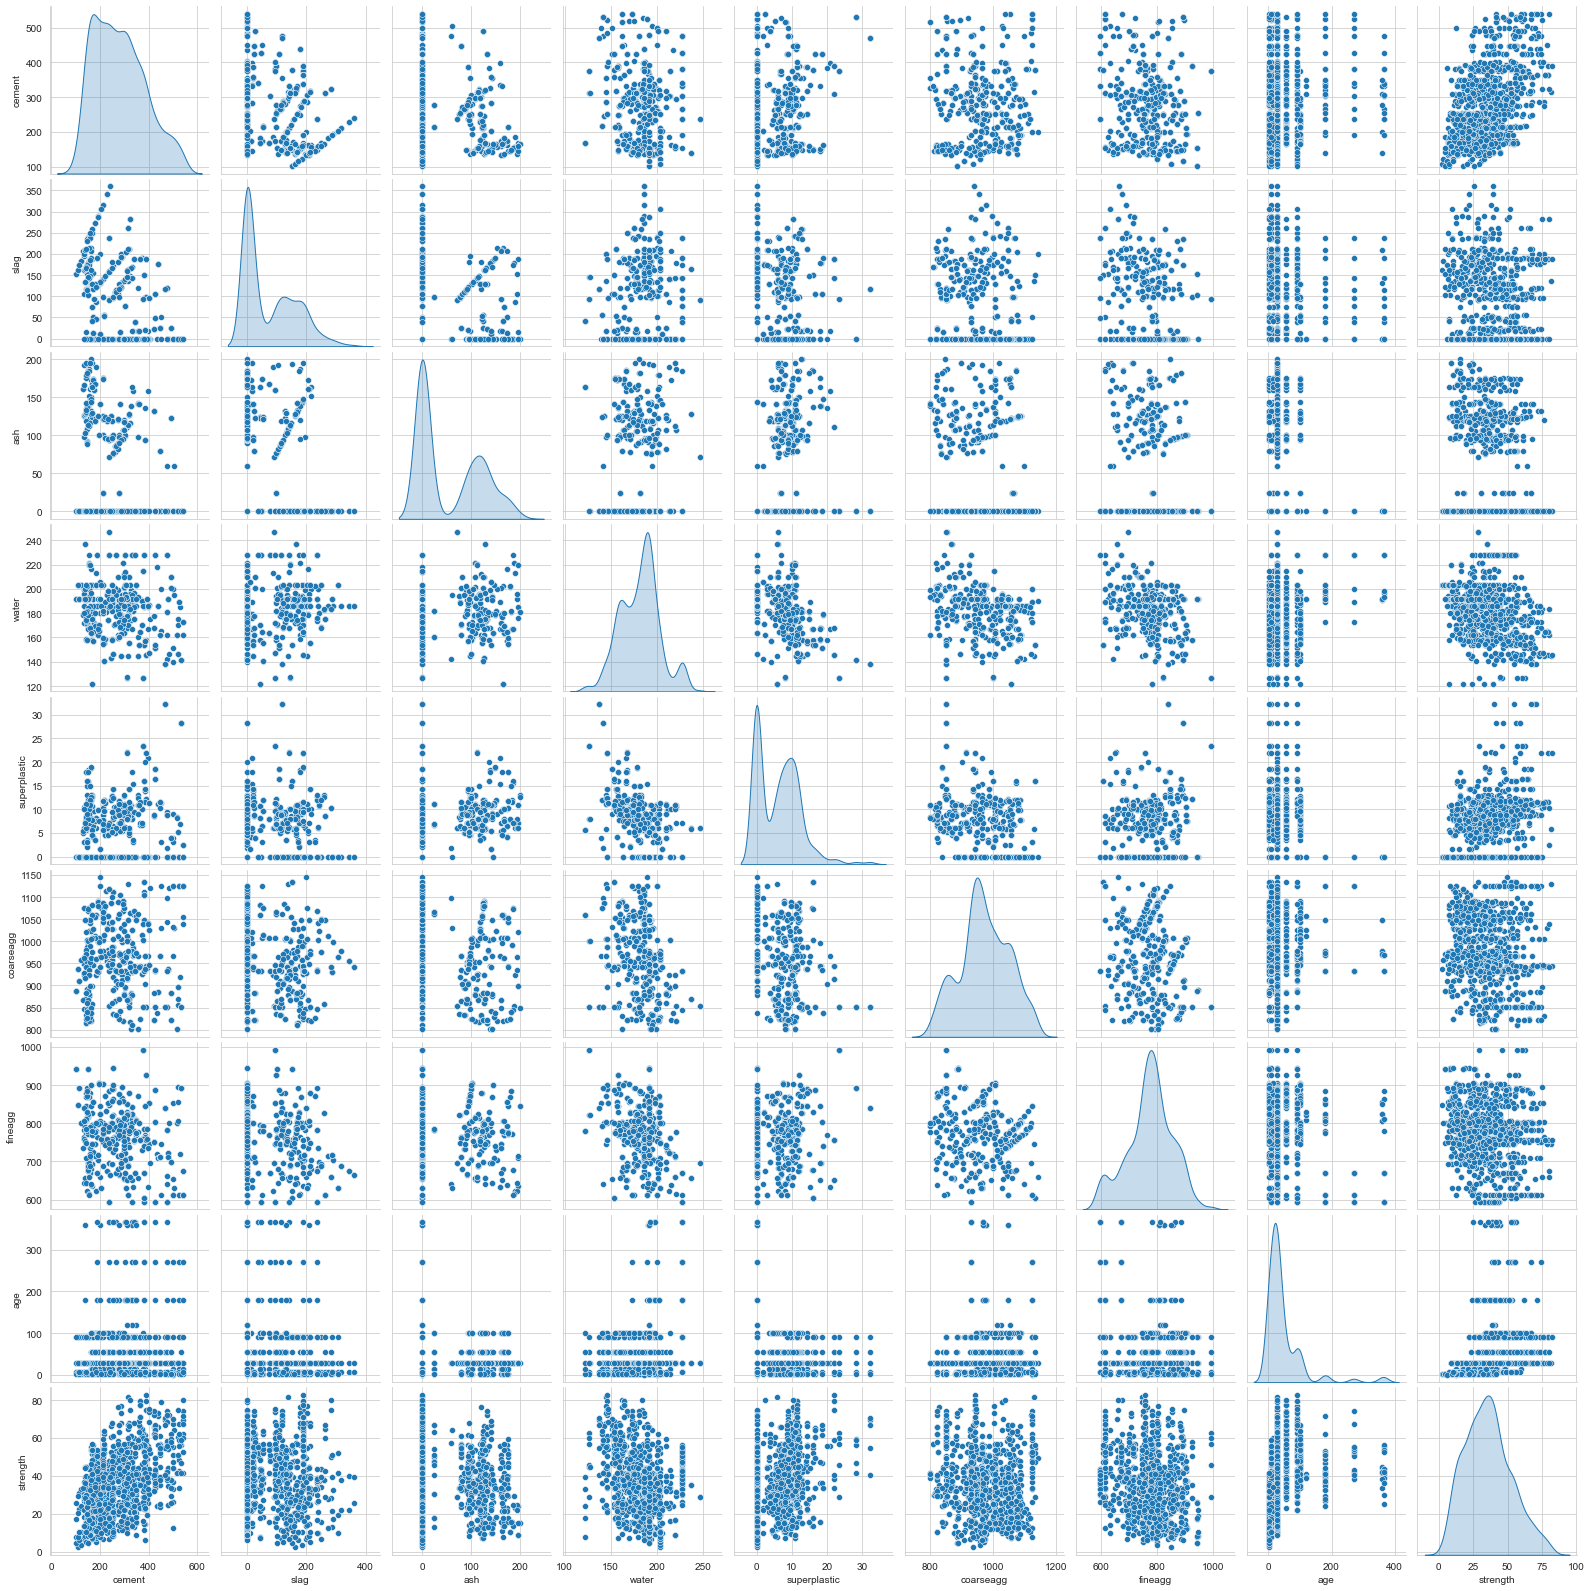

In [23]:
sns.pairplot(main_df, diag_kind='kde')

**Observations**

From the above plots, it is clear that:

- cement (50%)
- superplastic (37%)
- age (50%)

have a positive effect on the concrete's strength, while,

- water has a large negative effect (-29%) when compared to other negative factors


- cement and ash are negatively correlated (-40%)
- slag and ash are negatively correlated (-32%)
- water and superplastic are negatively correlated (-66%)
- water and fineagg are negatively correlated (-45%)
- water and age are positively correlated (28%)
- coarseagg has a positive correlation only with age (2%)
- superplastic and ash are positively correlated (38%)
- superplastic and fineagg are positively correlated (22%)
- courseagg is negatively correlated with all other variables

### (c) Pick one strategy to address the presence of outliers and missing values and perform necessary imputation (10 marks)

### Treat columns with outliers

In [24]:
columns_with_outliers = [
    'slag', 'water', 'superplastic', 'fineagg', 'age'
]
data_df = treat_outliers(main_df, columns_with_outliers)

### Verify the distribution after treating outliers

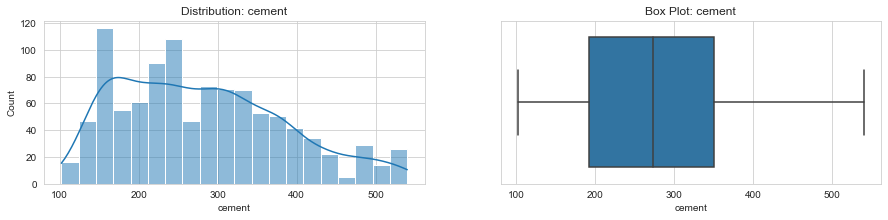

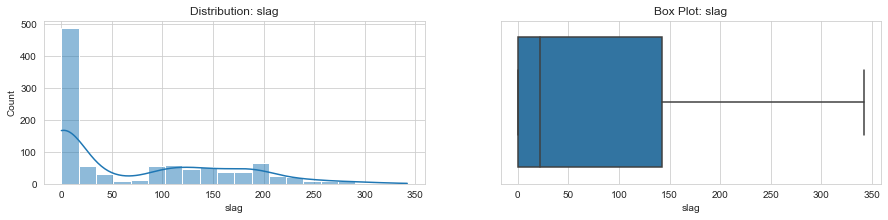

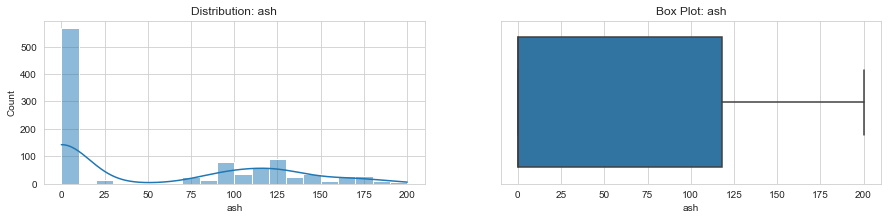

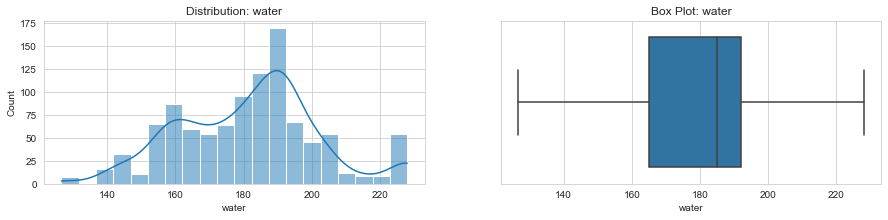

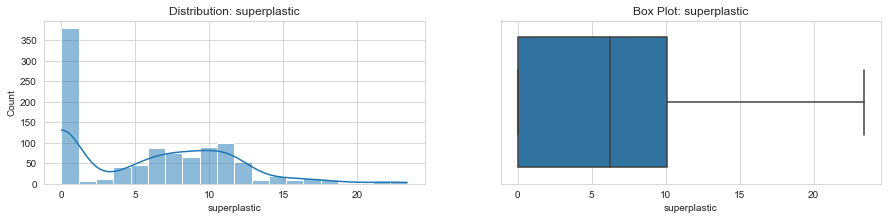

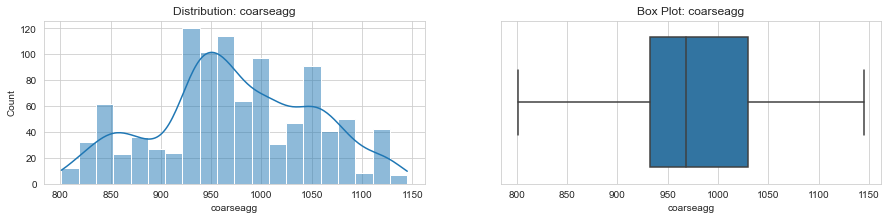

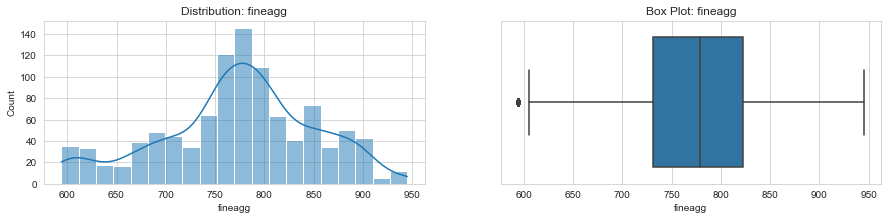

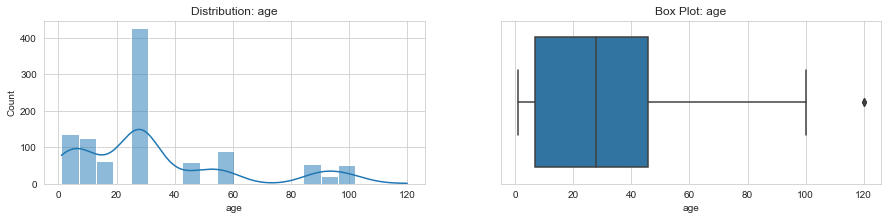

In [25]:
plot_dist_and_box(data_df, independent_features)

**Observations**
- Following columns still contain outliers:
    1. fineagg
    1. age
    
However, outliers have reduced to great extent. We will leave it as it is for now

## 2. Deliverable - 2 (Feature Engineering techniques) (15 marks)

### Import necessary libraries

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

### Common functions needed for the analysis

In [27]:
model_metrics = {
    'Model Name': [],
    'Train Score': [],
    'Test Score': []
}

def split_scale_train_predict_score(name, model, X, y, metrics):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
    
    pipeline = Pipeline([('scaler', StandardScaler()), ('model', model)])

    pipeline.fit(X_train , y_train)
    y_pred = pipeline.predict(X_test)

    train_score = pipeline.score(X_train, y_train)
    test_score = pipeline.score(X_test, y_test)
    
    if name in metrics['Model Name']:
        index = metrics['Model Name'].index(name)
        metrics['Train Score'][index] = train_score
        metrics['Test Score'][index] = test_score
    else:
        metrics['Model Name'].append(name)
        metrics['Train Score'].append(train_score)
        metrics['Test Score'].append(test_score)
    
    print(f'Model: {name}')
    print(f'  Train Score: {train_score}')
    print(f'  Test Score: {test_score}')    

# def split_train_predict_score(name, model, X, y, metrics):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

#     model.fit(X_train , y_train)
#     y_pred = model.predict(X_test)

#     train_score = model.score(X_train, y_train)
#     test_score = model.score(X_test, y_test)
    
#     if name in metrics['Model Name']:
#         index = metrics['Model Name'].index(name)
#         metrics['Train Score'][index] = train_score
#         metrics['Test Score'][index] = test_score
#     else:
#         metrics['Model Name'].append(name)
#         metrics['Train Score'].append(train_score)
#         metrics['Test Score'].append(test_score)
    
#     print(f'Model: {name}')
#     print(f'  Train Score: {train_score}')
#     print(f'  Test Score: {test_score}')
    
def create_and_sort_df(data, sort_by=None, ascending=False):
    df = pd.DataFrame(data)
    if sort_by is not None:
        sorted_df = df.sort_values(sort_by, ascending=ascending)
    else:
        sorted_df = df.copy()
    return (df, sorted_df)

def plot_bar_graph(x, y, data_df, title, hue=None):
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=x, y=y, data=data_df, hue=hue)
    ax.set_title(title)
    
# function to scale the dataset
def get_scaled_df(df):
    scaler = StandardScaler()

    scaler_result = scaler.fit_transform(df)
    scaled_df = pd.DataFrame(scaler_result, columns=list(df.columns))
    
    return scaled_df

### Separate independent data from the target data

In [28]:
X = data_df[independent_features]
y = data_df[dependent_feature]

In [29]:
X.shape

(1030, 8)

In [30]:
y.shape

(1030,)

In [31]:
X.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0


In [32]:
y.head()

0    29.89
1    23.51
2    29.22
3    45.85
4    18.29
Name: strength, dtype: float64

## Iteration 1 - Original dataset with scaled data

### Support Vector Regression (Iteration 1)

In [33]:
svr_model = SVR()  
split_scale_train_predict_score('SVR - Itr 1', svr_model, X, y, model_metrics)

Model: SVR - Itr 1
  Train Score: 0.726724242307589
  Test Score: 0.7260021389281288


In [34]:
# jp = sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k")
# jp.set_axis_labels('Actual Strength', 'Predicted Strength')

### Decision Tree Regressor (Iteration 1)

In [35]:
dtr_model = DecisionTreeRegressor(max_depth=7, random_state=0)
split_scale_train_predict_score('Decision Tree - Itr 1', dtr_model, X, y, model_metrics)

Model: Decision Tree - Itr 1
  Train Score: 0.930891661761472
  Test Score: 0.7919326354939153


In [36]:
feature_importance_df, sorted_feature_importance_df = create_and_sort_df({
    'Feature': X.columns,
    'Importance': dtr_model.feature_importances_
}, 'Importance')

sorted_feature_importance_df

,Feature,Importance
0,cement,0.362088
7,age,0.338518
3,water,0.108083
1,slag,0.080647
6,fineagg,0.049738
4,superplastic,0.046232
2,ash,0.007878
5,coarseagg,0.006816


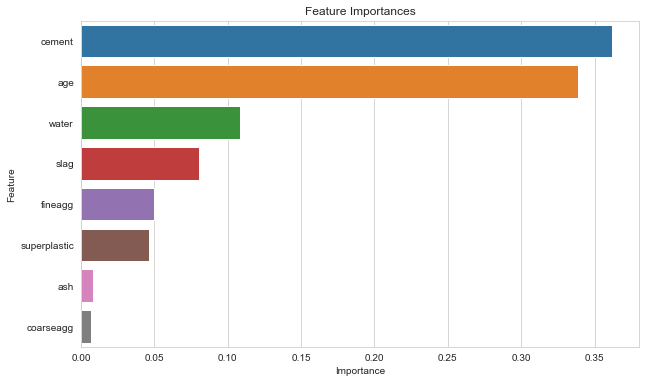

In [37]:
plot_bar_graph('Importance', 'Feature', sorted_feature_importance_df, 'Feature Importances')

**Observations**

- From the above plot it can be observed that cement, age and water are the top 3 important features for deciding concrete strength
- ash and coarseagg features are bottom 2 important features. In the later steps, we will drop coarseagg column and rebuild the model

### Linear Regression (Iteration 1)

In [38]:
lr_model = LinearRegression()
split_scale_train_predict_score('Linear - Itr 1', lr_model, X, y, model_metrics)

Model: Linear - Itr 1
  Train Score: 0.7411035195908349
  Test Score: 0.7361716950085552


In [39]:
lr_coef_df, sorted_lr_coef_df = create_and_sort_df({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}, 'Coefficient')

sorted_lr_coef_df

,Feature,Coefficient
0,cement,10.455941
7,age,8.671167
1,slag,6.133760
4,superplastic,2.268388
2,ash,2.128109
5,coarseagg,-0.101771
6,fineagg,-0.973514
3,water,-3.170705


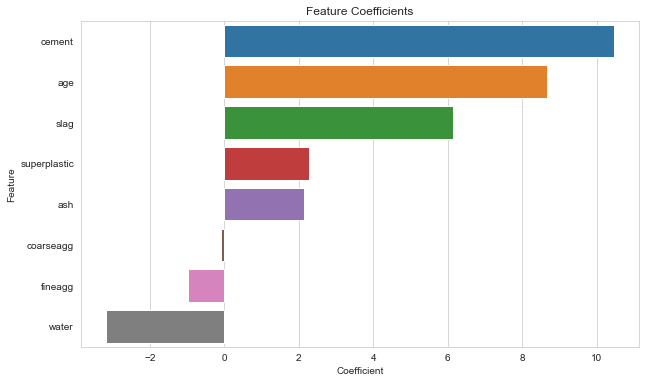

In [40]:
plot_bar_graph('Coefficient', 'Feature', sorted_lr_coef_df, 'Feature Coefficients')

In [41]:
# jp = sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k")
# jp.set_axis_labels('Actual Strength', 'Predicted Strength')

### Ridge Regression (Iteration 1)

In [42]:
ridge_model = Ridge(alpha=0.1)
split_scale_train_predict_score('Ridge - Itr 1', ridge_model, X, y, model_metrics)

Model: Ridge - Itr 1
  Train Score: 0.7411034201757085
  Test Score: 0.7361348917355848


In [43]:
ridge_coef_df, sorted_ridge_coef_df = create_and_sort_df({
    'Feature': X.columns,
    'Coefficient': ridge_model.coef_
}, 'Coefficient')

sorted_ridge_coef_df

,Feature,Coefficient
0,cement,10.443225
7,age,8.669940
1,slag,6.121985
4,superplastic,2.269214
2,ash,2.117535
5,coarseagg,-0.109217
6,fineagg,-0.983181
3,water,-3.177493


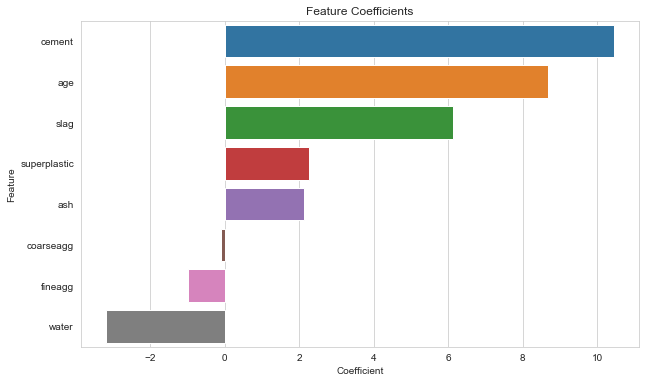

In [44]:
plot_bar_graph('Coefficient', 'Feature', sorted_ridge_coef_df, 'Feature Coefficients')

### Lasso Regression (Iteration 1)

In [45]:
lasso_model = Lasso(alpha=0.01)  
split_scale_train_predict_score('Lasso - Itr 1', lasso_model, X, y, model_metrics)

Model: Lasso - Itr 1
  Train Score: 0.7410991299094374
  Test Score: 0.7358028473528588


In [46]:
lasso_coef_df, sorted_lasso_coef_df = create_and_sort_df({
    'Feature': X.columns,
    'Coefficient': lasso_model.coef_
}, 'Coefficient')

sorted_lasso_coef_df

,Feature,Coefficient
0,cement,10.413272
7,age,8.659282
1,slag,6.091394
4,superplastic,2.291164
2,ash,2.078944
5,coarseagg,-0.103131
6,fineagg,-0.981279
3,water,-3.161588


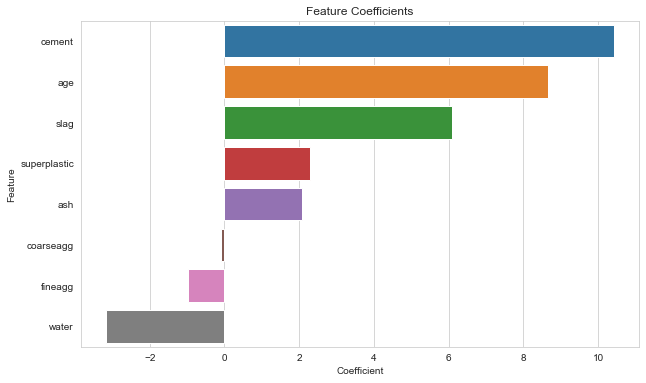

In [47]:
plot_bar_graph('Coefficient', 'Feature', sorted_lasso_coef_df, 'Feature Coefficients')

### Compare feature coefficients of Linear, Ridge and Lasso Regressions (Iteration 1)

In [48]:
coef_df, sorted_coef_df = create_and_sort_df({
    'Feature': X.columns,
    'Linear': lr_coef_df['Coefficient'],
    'Ridge': ridge_coef_df['Coefficient'],
    'Lasso': lasso_coef_df['Coefficient']
}, 'Linear')

sorted_coef_df

,Feature,Linear,Ridge,Lasso
0,cement,10.455941,10.443225,10.413272
7,age,8.671167,8.669940,8.659282
1,slag,6.133760,6.121985,6.091394
4,superplastic,2.268388,2.269214,2.291164
2,ash,2.128109,2.117535,2.078944
5,coarseagg,-0.101771,-0.109217,-0.103131
6,fineagg,-0.973514,-0.983181,-0.981279
3,water,-3.170705,-3.177493,-3.161588


In [49]:
melted_coef_df = pd.melt(coef_df, id_vars='Feature', var_name='Model', value_name='Coefficient')
melted_coef_df

,Feature,Model,Coefficient
0,cement,Linear,10.455941
1,slag,Linear,6.133760
2,ash,Linear,2.128109
3,water,Linear,-3.170705
4,superplastic,Linear,2.268388
5,coarseagg,Linear,-0.101771
6,fineagg,Linear,-0.973514
7,age,Linear,8.671167
8,cement,Ridge,10.443225
9,slag,Ridge,6.121985


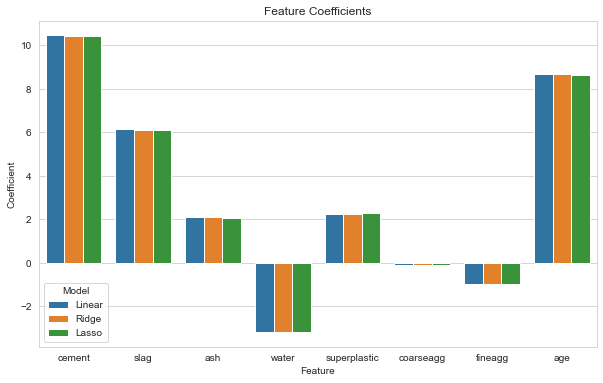

In [50]:
plot_bar_graph('Feature', 'Coefficient', melted_coef_df, 'Feature Coefficients', 'Model')

**Observations**

- From the above plot, it is very clear that coarseagg feature has the least coefficient

### 2. (b) Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help (5 marks)

### Introduce Polynomial Features (Iteration 1)

- Here I am selecting a degree of 3 because it provides better test results

In [51]:
poly_features = PolynomialFeatures(degree=3, interaction_only=True)
poly_X = poly_features.fit_transform(X)
poly_X.shape

(1030, 93)

### Linear Regression with polynomial features (Iteration 1)

In [52]:
poly_lr_model = LinearRegression()
split_scale_train_predict_score('Linear - Poly - Itr 1', poly_lr_model, poly_X, y, model_metrics)

print('\nCoefficients:', poly_lr_model.coef_)

Model: Linear - Poly - Itr 1
  Train Score: 0.8437820009548388
  Test Score: 0.7689175368177158

Coefficients: [ 8.25687173e-11  4.50386560e+02  2.41639397e+00  1.79244666e+02
  2.20592595e+02  4.31516556e+02  5.40857759e+01  5.31368647e+01
  2.79528912e+02 -2.40957247e+01 -6.79303892e+01 -4.19105446e+02
 -1.51214819e+02 -1.86146656e+02 -1.77740222e+02 -1.04794699e+02
 -5.74145463e+01 -9.42410053e+01  8.61666783e+01  2.13729642e+02
 -5.03558671e+01 -5.66659179e+01 -2.03301934e+02  8.39437736e+01
 -5.69050193e+00  3.21522149e+01 -9.61984825e+01 -3.02360237e+02
 -1.03970733e+02 -6.98977392e+01 -2.85182327e+02 -2.41749229e+02
 -2.81768039e+02  2.09638026e+00  4.04707282e+01  1.44928577e+01
 -1.05205293e+02 -4.98885612e-01  3.86332233e+01 -1.45402870e+00
 -4.36986819e+01  2.69366065e+01  2.96287077e+00  5.77382150e+01
 -1.05435785e+00 -7.95971037e+00  1.09532049e+01  1.21932307e+01
  6.88081585e+01  1.83958100e+02  1.26616204e+02  6.84498052e+01
  4.60081758e+01  3.71178569e+01 -3.74787407

### Ridge with polynomial features (Iteration 1)

In [53]:
poly_ridge_model = Ridge(alpha=0.1)
split_scale_train_predict_score('Ridge - Poly - Itr 1', poly_ridge_model, poly_X, y, model_metrics)

print('\nCoefficients:', poly_ridge_model.coef_)

Model: Ridge - Poly - Itr 1
  Train Score: 0.8277002585409756
  Test Score: 0.7783184695377336

Coefficients: [  0.           9.05708774  -2.34826536   5.75631074  29.88574619
   2.34137344  -4.10748727 -14.98322471   5.18076471  -7.86072045
  -9.59283544 -15.63337329 -10.24517905  21.80850624  -3.50189205
  -6.13844917  -7.01830522 -13.2112641   26.5214189   14.30919124
 -10.53523838  -1.62345237 -18.32875299  18.89464833   8.81941087
  14.33609582  -1.17602981 -13.7371239  -10.22178663   5.95564286
   2.35240871  -0.65188687  -1.05548823   8.96590461  18.60410031
  10.7100727  -14.26533815  -2.22217576  15.16381175  -0.73355847
 -20.82889438  15.04036435   1.03719975  18.95820608   0.2256208
 -14.17880007   1.35822718   9.75817734  31.63265517 -15.27256661
  -9.36915742  -6.81963196  -7.42543345 -12.4256715   -6.34887984
  18.7437317    2.55086787  12.53085261  -3.07319945  -2.20270041
   5.33593169   9.03814872   0.21409282   9.85721514  -5.53076563
  -2.32360769 -13.862443   -15.55

### Lasso with polynomial features (Iteration 1)

In [54]:
poly_lasso_model = Lasso(alpha=0.01)
split_scale_train_predict_score('Lasso - Poly - Itr 1', poly_lasso_model, poly_X, y, model_metrics)

print('\nCoefficients:', poly_lasso_model.coef_)

Model: Lasso - Poly - Itr 1
  Train Score: 0.8086887709682741
  Test Score: 0.7835393751473758

Coefficients: [  0.           0.         -14.5082922   -1.12550282  24.11852791
  -0.           0.         -11.55875596  -0.          -0.
  -0.6341531   -5.1519746   -0.24144752   8.70238785  -0.
  -0.          -0.          -0.           1.51925342   0.
  -0.          -0.          -6.1674488    0.90617888   0.
   4.71389233   0.           1.63497977 -16.77120396  -2.31228074
  -0.62636183   0.25194029   0.           0.          13.04741829
   4.47440013  -0.          -1.54802098   0.19755413   0.08679346
  -2.72746422   5.24056999   0.26487452   0.           0.
  -0.21272306  -0.           7.88893665   6.9430452   -5.1191416
  -4.51379993  -1.95309902  -3.24183229  -2.47722614  -4.81086307
  12.72846253   1.28230947   3.84394793  -3.54939954  -0.82128231
   4.5376204    2.00253478   0.32912306   1.57250188   0.
   2.44059107  -0.76640884  -0.          -3.36635008   2.79682295
  10.79977682  

C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5269.565856304045, tolerance: 20.535051883828018
  model = cd_fast.enet_coordinate_descent(


### Analyze the score metrics for different models (Iteration 1)

In [55]:
model_metric_df, sorted_model_metric_df = create_and_sort_df(model_metrics, 'Test Score')
sorted_model_metric_df

,Model Name,Train Score,Test Score
1,Decision Tree - Itr 1,0.930892,0.791933
7,Lasso - Poly - Itr 1,0.808689,0.783539
6,Ridge - Poly - Itr 1,0.827700,0.778318
5,Linear - Poly - Itr 1,0.843782,0.768918
2,Linear - Itr 1,0.741104,0.736172
3,Ridge - Itr 1,0.741103,0.736135
4,Lasso - Itr 1,0.741099,0.735803
0,SVR - Itr 1,0.726724,0.726002


**Observations**

- From the above metric data, it is clear that Decision Tree has the best test score.
- It can also be observed that Linear models (Linear, Ridge and Lasso) with Polynomial features perform better.

## Iteration 2 - Updated dataset
- Add water_cement_ratio column (water / cement). From the Cement Manufacturing domain, it has been observed that the water cement ratio is one of the important factors to decide the concrete strength. Hence I have decided to include a new composite column for water cement ratio into the dataset


- Remove coarseagg and fineagg columns. In the previous steps, it has been observed that these columns have least feature importance score in Decision Tree Regressor and least coefficient values in Linear models. Hence I have decided to drop these features


- Repeat training and testing of all the models in Iteration 1. Verify if the models perform better

In [56]:
updated_df = data_df.copy()
updated_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29


### 2. (a) Identify opportunities (if any) to create a composite feature, drop a feature etc. (5 marks)

In [57]:
columns_to_delete = ['coarseagg', 'fineagg']
column_to_insert = 'water_cement_ratio'

In [58]:
index = len(updated_df.columns) - 1
updated_df.insert(index, column_to_insert, updated_df['water']/updated_df['cement'])
updated_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,water_cement_ratio,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,1.440198,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,0.937241,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,0.749600,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,0.857143,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,1.248708,18.29


In [59]:
updated_df = updated_df.drop(columns_to_delete, axis=1)
updated_df.head()

,cement,slag,ash,water,superplastic,age,water_cement_ratio,strength
0,141.3,212.0,0.0,203.5,0.0,28.0,1.440198,29.89
1,168.9,42.2,124.3,158.3,10.8,14.0,0.937241,23.51
2,250.0,0.0,95.7,187.4,5.5,28.0,0.749600,29.22
3,266.0,114.0,0.0,228.0,0.0,28.0,0.857143,45.85
4,154.8,183.4,0.0,193.3,9.1,28.0,1.248708,18.29


### Study the correlation between independent columns

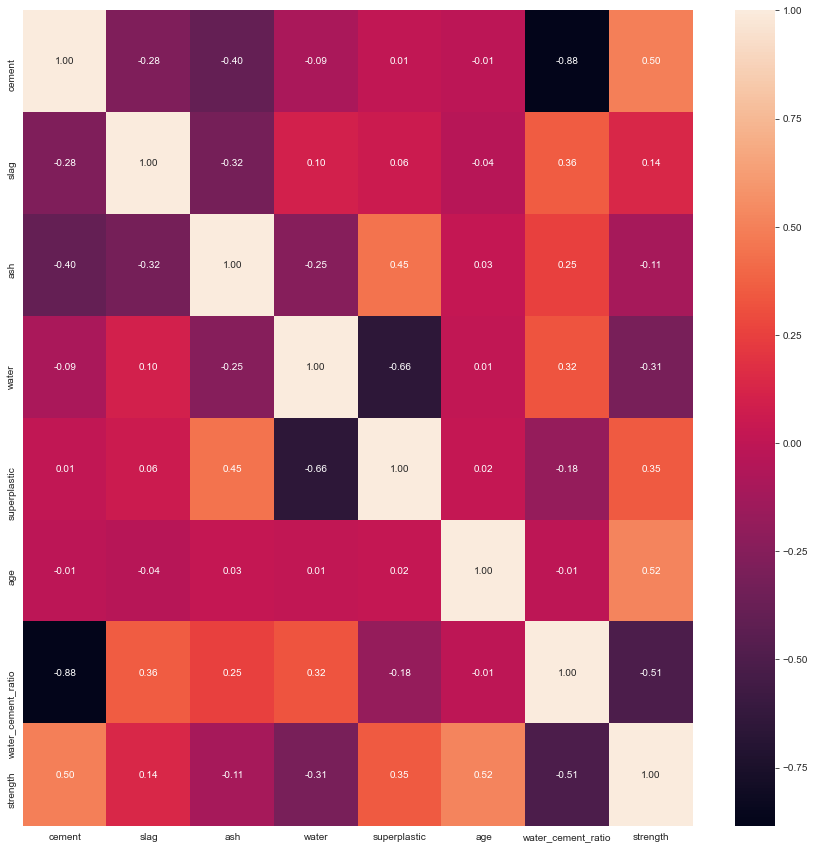

In [60]:
plot_correlation(updated_df)

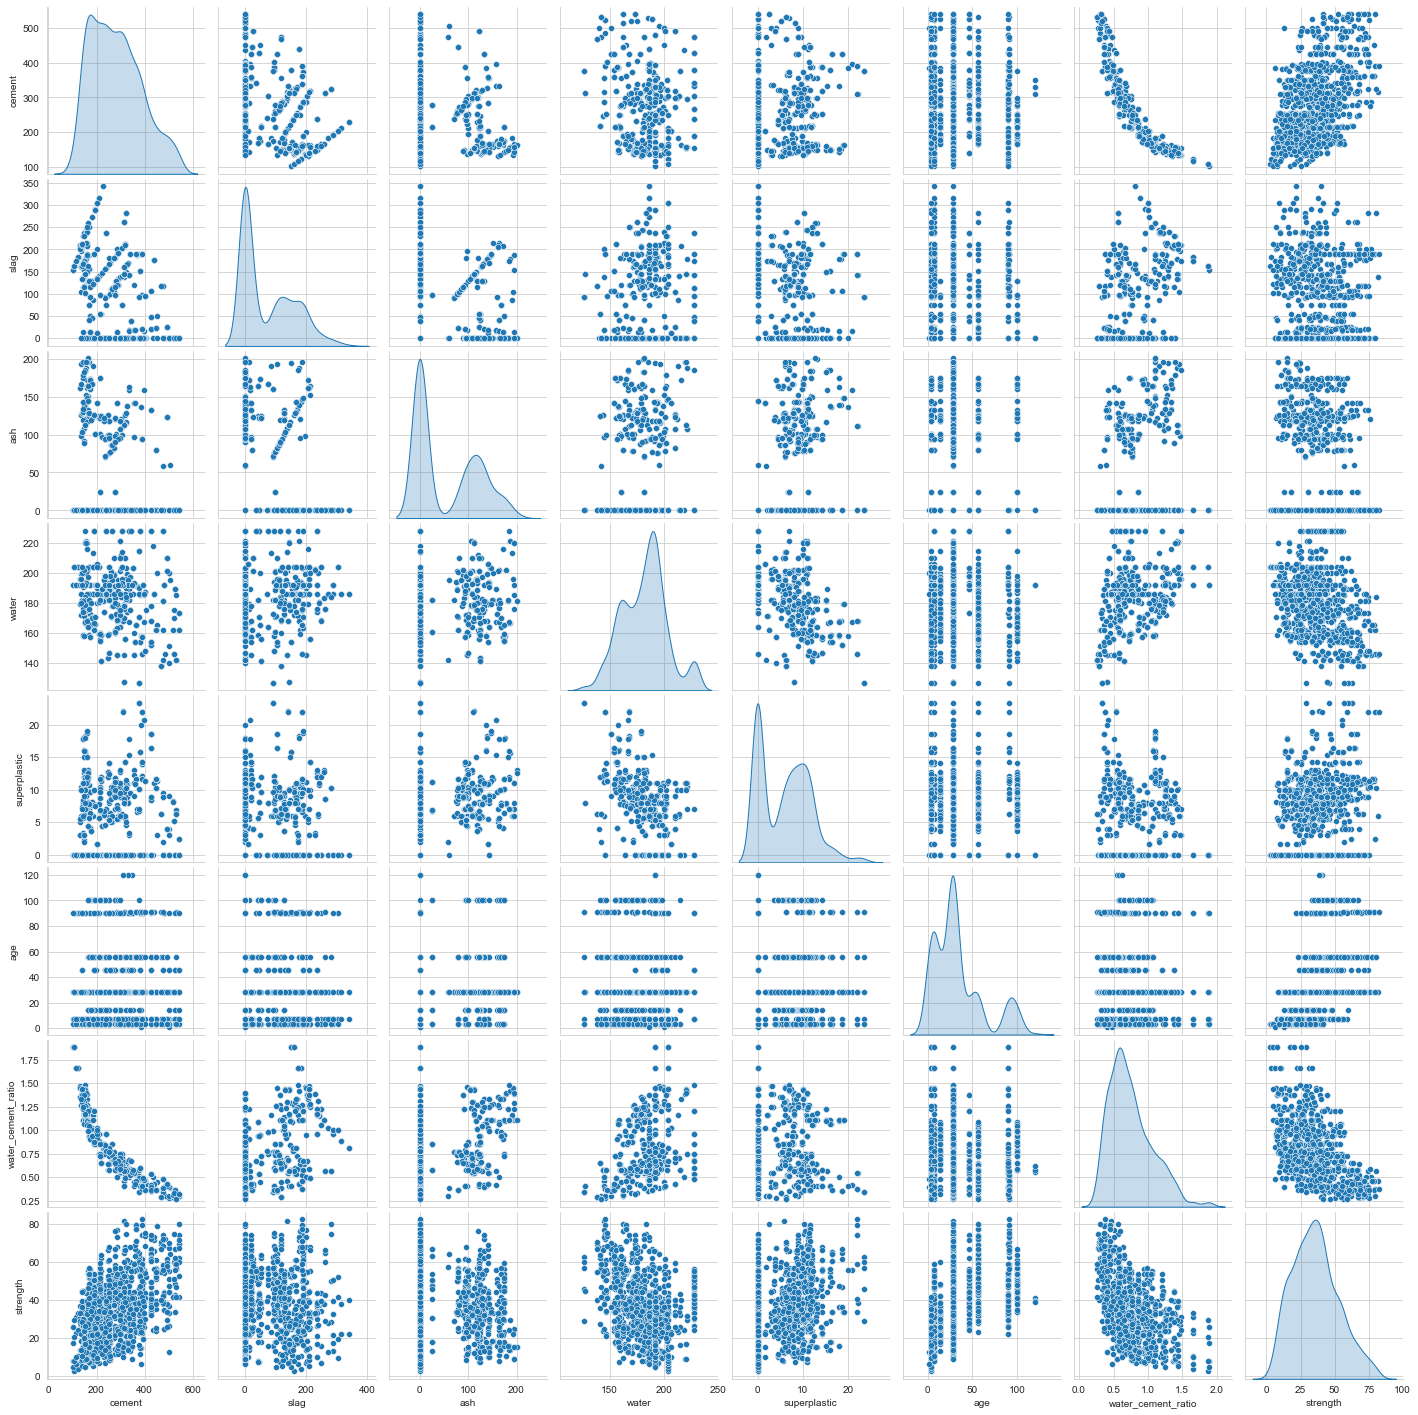

In [61]:
sns.pairplot(updated_df, diag_kind='kde')

**Observations**

- From the above heatmap and pair plot, we can observe that the strength has a high negative correlation with water-cement ratio

### Separate independent data from the target data

In [62]:
X = updated_df.drop(dependent_feature, axis=1)
y = updated_df[dependent_feature]

In [63]:
X.shape

(1030, 7)

In [64]:
y.shape

(1030,)

In [65]:
X.head()

,cement,slag,ash,water,superplastic,age,water_cement_ratio
0,141.3,212.0,0.0,203.5,0.0,28.0,1.440198
1,168.9,42.2,124.3,158.3,10.8,14.0,0.937241
2,250.0,0.0,95.7,187.4,5.5,28.0,0.749600
3,266.0,114.0,0.0,228.0,0.0,28.0,0.857143
4,154.8,183.4,0.0,193.3,9.1,28.0,1.248708


In [66]:
y.head()

0    29.89
1    23.51
2    29.22
3    45.85
4    18.29
Name: strength, dtype: float64

### Support Vector Regression (Iteration 2)

In [67]:
svr_model = SVR()  
split_scale_train_predict_score('SVR - Itr 2', svr_model, X, y, model_metrics)

Model: SVR - Itr 2
  Train Score: 0.7553312668765865
  Test Score: 0.7584997418530761


In [68]:
# jp = sns.jointplot(x=y_test, y=y_pred, kind="reg", color="k")
# jp.set_axis_labels('Actual Strength', 'Predicted Strength')

### Decision Tree Regressor (Iteration 2)

In [69]:
dtr_model = DecisionTreeRegressor(max_depth=7, random_state=0)
split_scale_train_predict_score('Decision Tree - Itr 2', dtr_model, X, y, model_metrics)

Model: Decision Tree - Itr 2
  Train Score: 0.9266759563022677
  Test Score: 0.7961639620284247


In [70]:
feature_importance_df, sorted_feature_importance_df = create_and_sort_df({
    'Feature': X.columns,
    'Importance': dtr_model.feature_importances_
}, 'Importance')

sorted_feature_importance_df

,Feature,Importance
6,water_cement_ratio,0.401291
5,age,0.388761
1,slag,0.088379
4,superplastic,0.056373
3,water,0.030337
2,ash,0.020429
0,cement,0.014430


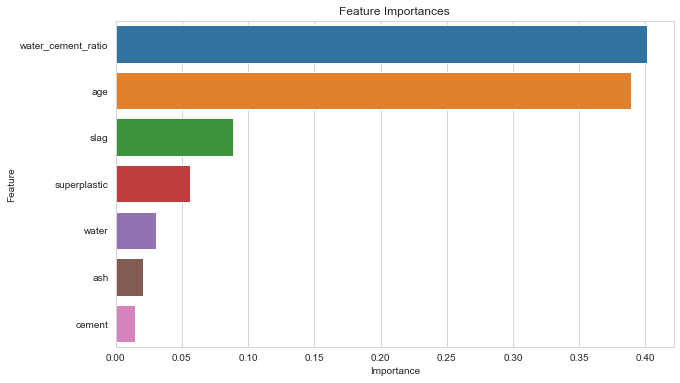

In [71]:
plot_bar_graph('Importance', 'Feature', sorted_feature_importance_df, 'Feature Importances')

### Linear Regression (Iteration 2)

In [72]:
lr_model = LinearRegression()
split_scale_train_predict_score('Linear - Itr 2', lr_model, X, y, model_metrics)

Model: Linear - Itr 2
  Train Score: 0.7439682618884111
  Test Score: 0.7402126303043812


In [73]:
lr_coef_df, sorted_lr_coef_df = create_and_sort_df({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}, 'Coefficient')

sorted_lr_coef_df

,Feature,Coefficient
0,cement,8.870460
5,age,8.682089
1,slag,7.185659
2,ash,2.957643
4,superplastic,1.922697
3,water,-2.104501
6,water_cement_ratio,-2.904323


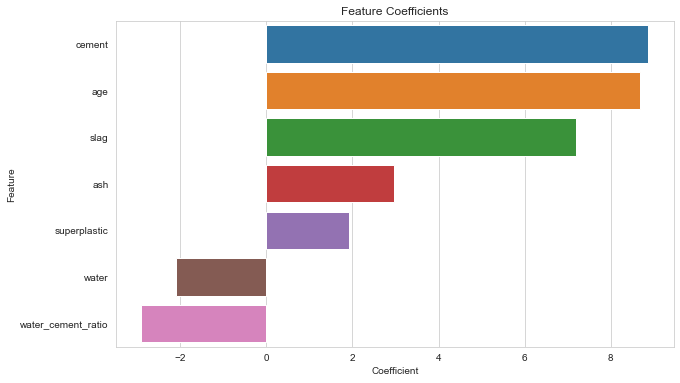

In [74]:
plot_bar_graph('Coefficient', 'Feature', sorted_lr_coef_df, 'Feature Coefficients')

### Ridge Regression (Iteration 2)

In [75]:
ridge_model = Ridge(alpha=0.1)
split_scale_train_predict_score('Ridge - Itr 2', ridge_model, X, y, model_metrics)

Model: Ridge - Itr 2
  Train Score: 0.7439682177763904
  Test Score: 0.7401820372248421


In [76]:
ridge_coef_df, sorted_ridge_coef_df = create_and_sort_df({
    'Feature': X.columns,
    'Coefficient': ridge_model.coef_
}, 'Coefficient')

sorted_ridge_coef_df

,Feature,Coefficient
0,cement,8.864147
5,age,8.680737
1,slag,7.182567
2,ash,2.953865
4,superplastic,1.924909
3,water,-2.102969
6,water_cement_ratio,-2.907571


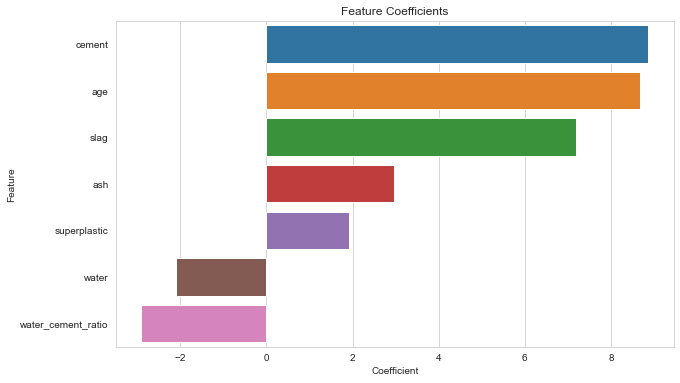

In [77]:
plot_bar_graph('Coefficient', 'Feature', sorted_ridge_coef_df, 'Feature Coefficients')

### Lasso Regression (Iteration 2)

In [78]:
lasso_model = Lasso(alpha=0.01)  
split_scale_train_predict_score('Lasso - Itr 2', lasso_model, X, y, model_metrics)

Model: Lasso - Itr 2
  Train Score: 0.7439638957646848
  Test Score: 0.7399315868003999


In [79]:
lasso_coef_df, sorted_lasso_coef_df = create_and_sort_df({
    'Feature': X.columns,
    'Coefficient': lasso_model.coef_
}, 'Coefficient')

sorted_lasso_coef_df

,Feature,Coefficient
0,cement,8.843639
5,age,8.670223
1,slag,7.146670
2,ash,2.912212
4,superplastic,1.946199
3,water,-2.093167
6,water_cement_ratio,-2.892212


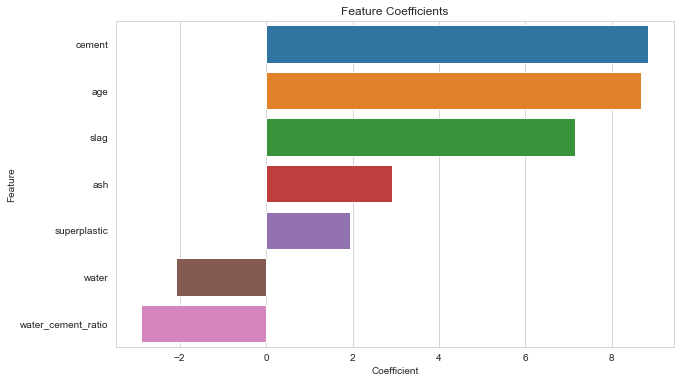

In [80]:
plot_bar_graph('Coefficient', 'Feature', sorted_lasso_coef_df, 'Feature Coefficients')

### Compare feature coefficients of Linear, Ridge and Lasso Regressions (Iteration 2)

In [81]:
coef_df, sorted_coef_df = create_and_sort_df({
    'Feature': X.columns,
    'Linear': lr_coef_df['Coefficient'],
    'Ridge': ridge_coef_df['Coefficient'],
    'Lasso': lasso_coef_df['Coefficient']
}, 'Linear')

sorted_coef_df

,Feature,Linear,Ridge,Lasso
0,cement,8.870460,8.864147,8.843639
5,age,8.682089,8.680737,8.670223
1,slag,7.185659,7.182567,7.146670
2,ash,2.957643,2.953865,2.912212
4,superplastic,1.922697,1.924909,1.946199
3,water,-2.104501,-2.102969,-2.093167
6,water_cement_ratio,-2.904323,-2.907571,-2.892212


In [82]:
melted_coef_df = pd.melt(coef_df, id_vars='Feature', var_name='Model', value_name='Coefficient')
melted_coef_df

,Feature,Model,Coefficient
0,cement,Linear,8.870460
1,slag,Linear,7.185659
2,ash,Linear,2.957643
3,water,Linear,-2.104501
4,superplastic,Linear,1.922697
5,age,Linear,8.682089
6,water_cement_ratio,Linear,-2.904323
7,cement,Ridge,8.864147
8,slag,Ridge,7.182567
9,ash,Ridge,2.953865


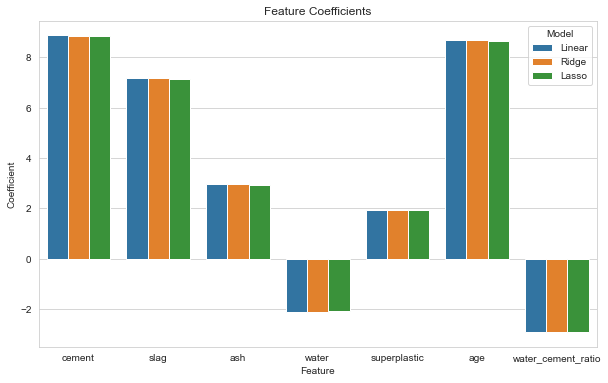

In [83]:
plot_bar_graph('Feature', 'Coefficient', melted_coef_df, 'Feature Coefficients', 'Model')

### 2. (b) Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help (5 marks)

### Introduce Polynomial Features (Iteration 2)

- Here I am selecting a degree of 3 because it provides better test results

In [84]:
X.head()

,cement,slag,ash,water,superplastic,age,water_cement_ratio
0,141.3,212.0,0.0,203.5,0.0,28.0,1.440198
1,168.9,42.2,124.3,158.3,10.8,14.0,0.937241
2,250.0,0.0,95.7,187.4,5.5,28.0,0.749600
3,266.0,114.0,0.0,228.0,0.0,28.0,0.857143
4,154.8,183.4,0.0,193.3,9.1,28.0,1.248708


In [85]:
poly_features = PolynomialFeatures(degree=3, interaction_only=True)
poly_X = poly_features.fit_transform(X)
poly_X.shape

(1030, 64)

### Linear Regression with polynomial features (Iteration 2)

In [86]:
poly_lr_model = LinearRegression()
split_scale_train_predict_score('Linear - Poly - Itr 2', poly_lr_model, poly_X, y, model_metrics)

print('\nCoefficients:', poly_lr_model.coef_)

Model: Linear - Poly - Itr 2
  Train Score: 0.7528653393276344
  Test Score: 0.7043580481091343

Coefficients: [-1.66326760e+14  2.61200751e+01  3.32965605e+01  1.05436294e+02
 -9.76727640e+00  6.93327090e+01 -7.21628740e+01 -2.04968859e+01
 -6.41417108e+01 -5.12231128e+01 -2.74592172e+01 -6.75364020e+01
  4.66182702e+01 -9.76727640e+00  1.82592849e+00 -1.40075004e+01
 -2.98904861e+01  7.86148130e+01  1.89043444e+00 -5.26238826e+01
 -4.78458912e+01 -8.86321027e+00 -6.60652709e+00 -1.94710069e+01
  1.58218552e+01  1.29447026e+01  1.61735755e+01 -3.66564612e+01
  2.66129081e+01 -1.07472572e+01  5.58347269e+01  3.29850602e+01
 -2.55838550e+01 -1.40075004e+01  5.65909047e+01  9.86205598e+00
  1.83938180e+01 -5.26238826e+01  4.99859468e+01 -1.72522623e+01
  2.21321884e+01 -2.71179586e+01 -1.94710069e+01  1.58218552e+01
  2.87710101e+01 -1.46921422e+00 -2.72721679e+00 -1.74967595e+01
 -1.22703421e+01 -2.83634076e+01 -1.89414299e+00 -6.35007345e+00
  2.41496584e+01 -2.64980923e+01  1.53894007

### Ridge with polynomial features (Iteration 2)

In [87]:
poly_ridge_model = Ridge(alpha=0.1)
split_scale_train_predict_score('Ridge - Poly - Itr 2', poly_ridge_model, poly_X, y, model_metrics)

print('\nCoefficients:', poly_ridge_model.coef_)

Model: Ridge - Poly - Itr 2
  Train Score: 0.8030317233067567
  Test Score: 0.7915321829955576

Coefficients: [  0.          23.70568499   8.01346358  19.19815747 -14.62401279
   7.69457223   2.23693345 -16.17442387 -15.12272583  -3.97245374
 -11.90276689 -31.62473467   7.06411646 -14.62401279   9.91411022
   3.76806005 -10.96111592  21.69574937   3.95360819  -6.3218974
  -3.4514057    5.26682375   6.98584848  10.78646128   1.75779625
  20.99732431   0.35100098  -3.14297527  -2.44447892  -4.67280333
   7.43902982   9.85069659  -3.58294242   3.76806005   1.02642093
   0.79900125  10.58536931  -6.3218974   15.71969675  -5.37218895
  27.79790687  -5.45931641  10.78646128   1.75779625   1.42641846
  -2.01645829   0.24619647  -4.55463062  -1.88514415 -13.10744315
 -12.14453996  -0.07640668   7.18337209  -2.51669012  -2.91628426
 -18.40056601  -7.97697957  -0.58878545   3.04157909   5.46412524
   4.67096534 -12.47255297   1.45947276  -1.35193675]


### Lasso with polynomial features (Iteration 2)

In [88]:
poly_lasso_model = Lasso(alpha=0.01)
split_scale_train_predict_score('Lasso - Poly - Itr 2', poly_lasso_model, poly_X, y, model_metrics)

print('\nCoefficients:', poly_lasso_model.coef_)

Model: Lasso - Poly - Itr 2
  Train Score: 0.7944730054335531
  Test Score: 0.7873728887521496

Coefficients: [ 0.00000000e+00  1.87362915e+01  0.00000000e+00  1.32308802e+01
 -1.38335579e+01 -0.00000000e+00  8.04693674e+00 -0.00000000e+00
 -5.81726188e-01  0.00000000e+00 -7.34272004e+00 -1.10301043e+01
  3.54946263e+00 -6.29349861e+00  6.69266665e+00  4.62394216e+00
  0.00000000e+00  7.92342998e+00 -7.32912495e-02 -3.06242113e+00
 -0.00000000e+00  9.19478192e-04 -0.00000000e+00  2.19302209e+00
 -0.00000000e+00  1.66207688e+00  0.00000000e+00 -5.00367803e+00
 -5.95440820e-01 -1.99700848e+00  0.00000000e+00 -7.51086120e-02
 -1.88820081e+00  0.00000000e+00 -4.30056155e+00 -1.76883636e-01
  7.01925010e+00 -1.71974362e-01  1.28520468e+00 -2.67328492e+00
  2.06850581e+01 -2.80790596e+00  1.75691455e+01 -1.30057255e+00
 -2.87422134e+00 -1.69483075e+00  6.83697773e-01 -0.00000000e+00
  8.93549435e-01 -1.37487449e+00 -6.99311295e-01  1.30664799e+00
 -0.00000000e+00 -2.40390006e+00 -3.42006622e

C:\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1525.347556182005, tolerance: 20.535051883828018
  model = cd_fast.enet_coordinate_descent(


### Analyze the score metrics for different models (Iteration 2)

In [89]:
model_metric_df, sorted_model_metric_df = create_and_sort_df(model_metrics, 'Test Score')
model_metric_df

,Model Name,Train Score,Test Score
0,SVR - Itr 1,0.726724,0.726002
1,Decision Tree - Itr 1,0.930892,0.791933
2,Linear - Itr 1,0.741104,0.736172
3,Ridge - Itr 1,0.741103,0.736135
4,Lasso - Itr 1,0.741099,0.735803
5,Linear - Poly - Itr 1,0.843782,0.768918
6,Ridge - Poly - Itr 1,0.827700,0.778318
7,Lasso - Poly - Itr 1,0.808689,0.783539
8,SVR - Itr 2,0.755331,0.758500
9,Decision Tree - Itr 2,0.926676,0.796164


In [90]:
sorted_model_metric_df

,Model Name,Train Score,Test Score
9,Decision Tree - Itr 2,0.926676,0.796164
1,Decision Tree - Itr 1,0.930892,0.791933
14,Ridge - Poly - Itr 2,0.803032,0.791532
15,Lasso - Poly - Itr 2,0.794473,0.787373
7,Lasso - Poly - Itr 1,0.808689,0.783539
6,Ridge - Poly - Itr 1,0.827700,0.778318
5,Linear - Poly - Itr 1,0.843782,0.768918
8,SVR - Itr 2,0.755331,0.758500
10,Linear - Itr 2,0.743968,0.740213
11,Ridge - Itr 2,0.743968,0.740182


**Observations**

- From the above metrics, it can be observed that the test score performance of models in Iteration 2 is better than Iteration 1. However, SVR model is an exception

### 2. (c) Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength (5 marks)

In [91]:
copied_data_df = data_df.copy()
copied_data_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29


In [92]:
index = len(copied_data_df.columns) - 1
copied_data_df.insert(index, column_to_insert, copied_data_df['water']/copied_data_df['cement'])
copied_data_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,water_cement_ratio,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,1.440198,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,0.937241,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,0.749600,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,0.857143,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,1.248708,18.29


In [93]:
scaled_data_df = get_scaled_df(copied_data_df)
scaled_data_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,water_cement_ratio,strength
0,-1.339017,1.625292,-0.847144,1.062459,-1.090842,-0.014398,-0.305317,-0.188562,2.212075,-0.355018
1,-1.074790,-0.365026,1.096078,-1.132696,0.881980,1.388141,0.301063,-0.689672,0.603159,-0.737108
2,-0.298384,-0.859675,0.648965,0.280557,-0.086164,-0.206121,1.127367,-0.188562,0.002911,-0.395144
3,-0.145209,0.476581,-0.847144,2.252311,-1.090842,-0.526517,-1.303237,-0.188562,0.346932,0.600806
4,-1.209776,1.290056,-0.847144,0.567092,0.571443,0.958372,-0.963817,-0.188562,1.599514,-1.049727


In [94]:
from sklearn.cluster import KMeans

cluster_range = range(1, 11)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []

for num_clusters in cluster_range:
    kmeans_model = KMeans(num_clusters, n_init=5)
    kmeans_model.fit(scaled_data_df)
    cluster_errors.append( kmeans_model.inertia_ )

cluster_df = pd.DataFrame( { 'num_clusters': cluster_range, "cluster_errors": cluster_errors } )
cluster_df

,num_clusters,cluster_errors
0,1,10300.000000
1,2,8479.372649
2,3,7099.311411
3,4,6009.434212
4,5,5562.948462
5,6,5074.422120
6,7,4684.101190
7,8,4425.711986
8,9,4162.220591
9,10,3942.763177


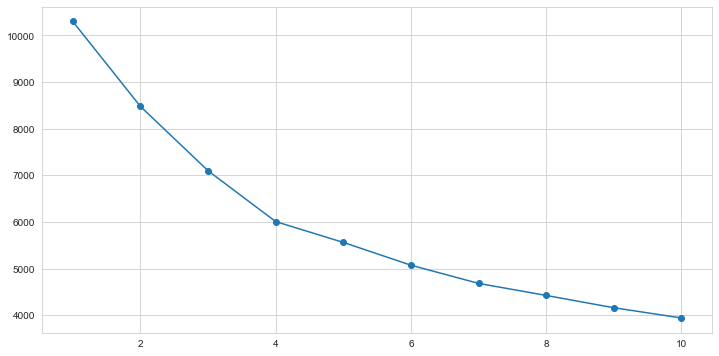

In [95]:
plt.figure(figsize=(12,6))
plt.plot( cluster_df.num_clusters, cluster_df.cluster_errors, marker = "o" )

**Observations**

- The elbow plot above confirms that there are likely around 4 to 6 clusters. Let us consider 4 clusters

In [96]:
kmeans_model = KMeans(n_clusters=4, random_state=1)
kmeans_model.fit(scaled_data_df)
predicted_classes = kmeans_model.predict(scaled_data_df)
predicted_classes

array([0, 3, 3, ..., 1, 2, 2])

In [97]:
data_with_class_df = scaled_data_df.copy()
data_with_class_df['class'] = predicted_classes

data_with_class_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,water_cement_ratio,strength,class
0,-1.339017,1.625292,-0.847144,1.062459,-1.090842,-0.014398,-0.305317,-0.188562,2.212075,-0.355018,0
1,-1.074790,-0.365026,1.096078,-1.132696,0.881980,1.388141,0.301063,-0.689672,0.603159,-0.737108,3
2,-0.298384,-0.859675,0.648965,0.280557,-0.086164,-0.206121,1.127367,-0.188562,0.002911,-0.395144,3
3,-0.145209,0.476581,-0.847144,2.252311,-1.090842,-0.526517,-1.303237,-0.188562,0.346932,0.600806,0
4,-1.209776,1.290056,-0.847144,0.567092,0.571443,0.958372,-0.963817,-0.188562,1.599514,-1.049727,0


In [98]:
data_with_class_df['class'].value_counts()

3    317
2    251
0    242
1    220
Name: class, dtype: int64

In [99]:
centroids = kmeans_model.cluster_centers_
centroids

array([[-0.88480468,  1.2193098 , -0.30530719,  0.61944444, -0.45769104,
        -0.33188043, -0.30096177, -0.14972002,  1.14997766, -0.45333215],
       [ 0.97725582,  0.4441068 , -0.36872874, -0.92258408,  0.97883315,
        -0.65333079,  0.07627998, -0.02033168, -0.9882121 ,  1.0996031 ],
       [ 0.72917473, -0.73845283, -0.79744118,  0.72615845, -1.04135394,
         0.4225174 , -0.27355588, -0.03049104, -0.54776112, -0.25120778],
       [-0.58011483, -0.65433694,  1.12038612, -0.40757989,  0.49463021,
         0.37222704,  0.39341854,  0.15255036,  0.24164072, -0.21814873]])

In [100]:
centroid_df = pd.DataFrame(centroids, columns=scaled_data_df.columns)
centroid_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,water_cement_ratio,strength
0,-0.884805,1.219310,-0.305307,0.619444,-0.457691,-0.331880,-0.300962,-0.149720,1.149978,-0.453332
1,0.977256,0.444107,-0.368729,-0.922584,0.978833,-0.653331,0.076280,-0.020332,-0.988212,1.099603
2,0.729175,-0.738453,-0.797441,0.726158,-1.041354,0.422517,-0.273556,-0.030491,-0.547761,-0.251208
3,-0.580115,-0.654337,1.120386,-0.407580,0.494630,0.372227,0.393419,0.152550,0.241641,-0.218149


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000185AA836490>,
      dtype=object)

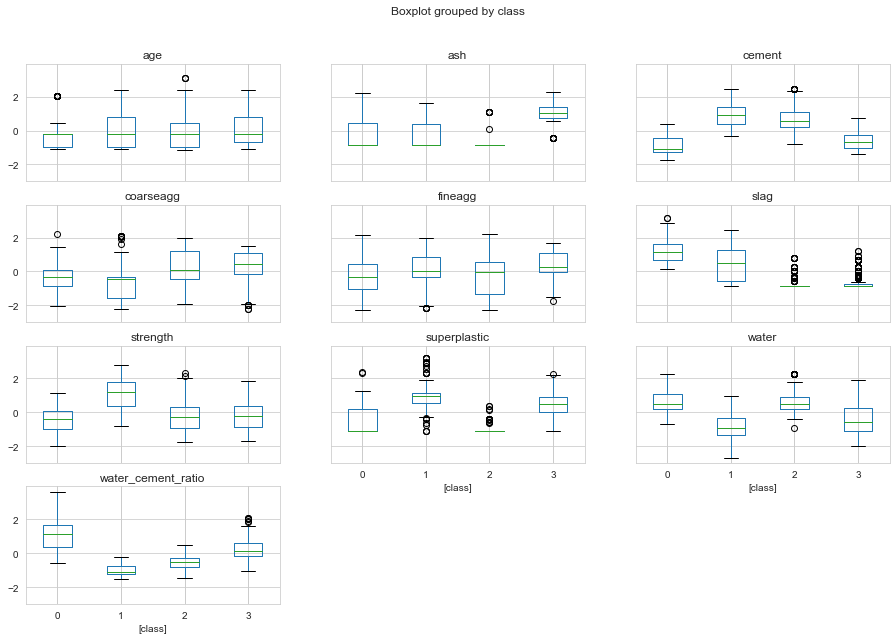

In [101]:
data_with_class_df.boxplot(by='class', layout=(4, 3), figsize=(15, 10))

In [102]:
columns = independent_features.copy()
columns.append(column_to_insert)
columns

['cement',
 'slag',
 'ash',
 'water',
 'superplastic',
 'coarseagg',
 'fineagg',
 'age',
 'water_cement_ratio']

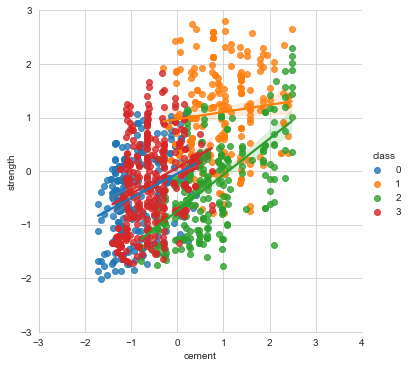

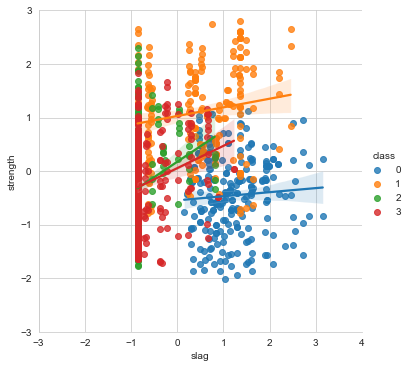

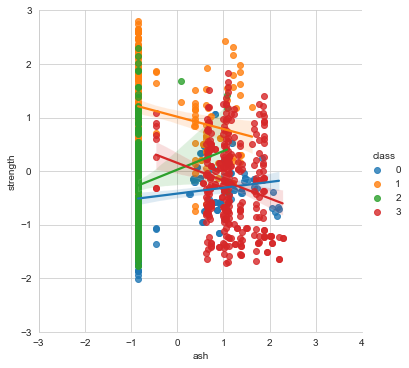

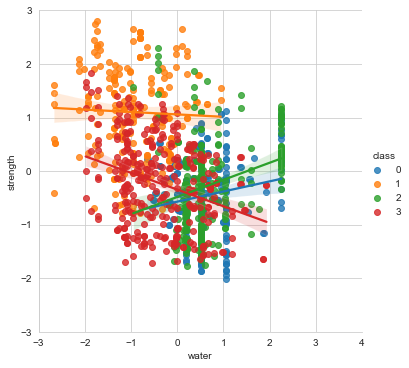

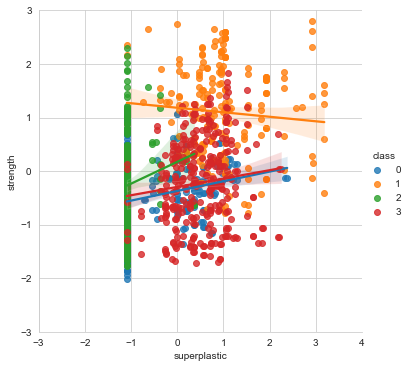

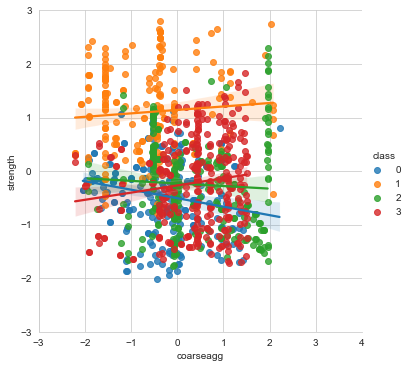

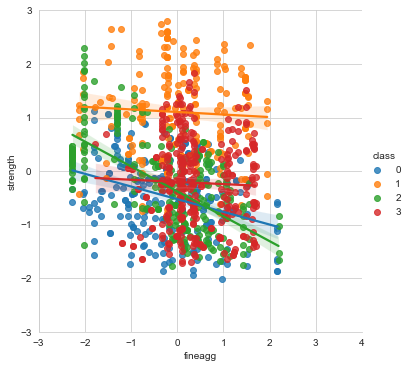

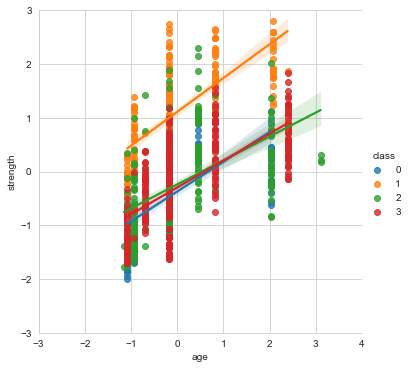

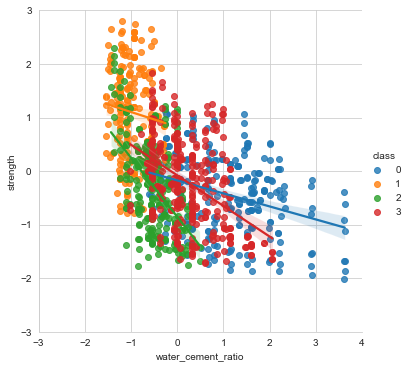

In [103]:
for col in columns:
    plot = sns.lmplot(x=col, y='strength', data=data_with_class_df, hue='class')
    plot.set(ylim=(-3, 3), xlim=(-3, 4))

**Observations**

- Clusters within cement, age and slag have positive correlation with strength
- Clusters within water_cement_ratio and water have negative correlation with strength


- ash and superplastic have medium to low preditive power for strength
- coarseagg and fineagg have very low predictive power for strength


- In summary, age, water_cement_ratio, cement, water and slag have high preditive power of strength

## 3. Deliverable - 3 (create the model ) ( 15 marks)

### (a) Obtain feature importance for the individual features and present your findings

In [144]:
data_with_class_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,water_cement_ratio,strength,class
0,-1.339017,1.625292,-0.847144,1.062459,-1.090842,-0.014398,-0.305317,-0.188562,2.212075,-0.355018,0
1,-1.074790,-0.365026,1.096078,-1.132696,0.881980,1.388141,0.301063,-0.689672,0.603159,-0.737108,3
2,-0.298384,-0.859675,0.648965,0.280557,-0.086164,-0.206121,1.127367,-0.188562,0.002911,-0.395144,3
3,-0.145209,0.476581,-0.847144,2.252311,-1.090842,-0.526517,-1.303237,-0.188562,0.346932,0.600806,0
4,-1.209776,1.290056,-0.847144,0.567092,0.571443,0.958372,-0.963817,-0.188562,1.599514,-1.049727,0


In [145]:
columns = independent_features.copy()
columns.append(column_to_insert)
columns

['cement',
 'slag',
 'ash',
 'water',
 'superplastic',
 'coarseagg',
 'fineagg',
 'age',
 'water_cement_ratio']

In [146]:
X = data_with_class_df[columns]
y = data_with_class_df[dependent_feature]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

### Random Forest Regressor - Feature Importances

In [147]:
rf_model = RandomForestRegressor()

rf_model.fit(X_train , y_train)
y_pred = rf_model.predict(X_test)

train_score = rf_model.score(X_train, y_train)
test_score = rf_model.score(X_test, y_test)

print('Decision Tree Regressor')
print(f'  Train Score: {train_score}')
print(f'  Test Score: {test_score}')

Decision Tree Regressor
  Train Score: 0.984323971855546
  Test Score: 0.8949818834335317


In [148]:
feature_importance_df, sorted_feature_importance_df = create_and_sort_df({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}, 'Importance')

sorted_feature_importance_df

,Feature,Importance
8,water_cement_ratio,0.385512
7,age,0.351213
1,slag,0.083397
4,superplastic,0.038316
6,fineagg,0.036347
0,cement,0.036035
3,water,0.030832
5,coarseagg,0.022792
2,ash,0.015556


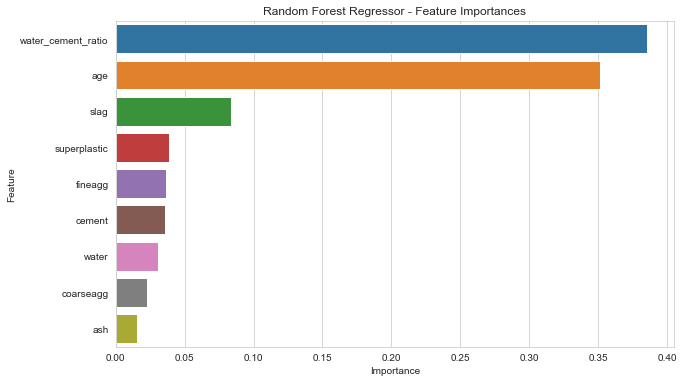

In [149]:
plot_bar_graph('Importance', 'Feature', sorted_feature_importance_df, 'Random Forest Regressor - Feature Importances')

**Observations**

- From the above plot, it is clear that water_cement_ratio, age, slag and superplastic contribute more than 90% in predicting strength in a Random Forest Regressor model

### Decision Tree Regressor - Feature Importances

In [150]:
dtr_model = DecisionTreeRegressor(max_depth=7, random_state=0)

dtr_model.fit(X_train , y_train)
y_pred = dtr_model.predict(X_test)

train_score = dtr_model.score(X_train, y_train)
test_score = dtr_model.score(X_test, y_test)

print('Decision Tree Regressor')
print(f'  Train Score: {train_score}')
print(f'  Test Score: {test_score}')

Decision Tree Regressor
  Train Score: 0.9344919524426539
  Test Score: 0.8072608613875878


In [151]:
feature_importance_df, sorted_feature_importance_df = create_and_sort_df({
    'Feature': X.columns,
    'Importance': dtr_model.feature_importances_
}, 'Importance')

sorted_feature_importance_df

,Feature,Importance
8,water_cement_ratio,0.394372
7,age,0.385700
1,slag,0.080028
4,superplastic,0.050740
6,fineagg,0.027358
2,ash,0.024208
3,water,0.014340
0,cement,0.013558
5,coarseagg,0.009697


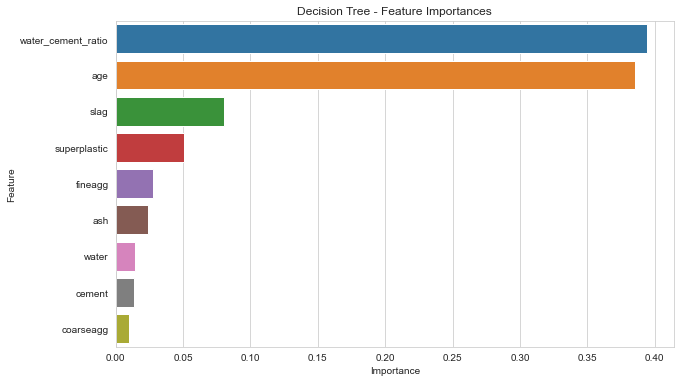

In [152]:
plot_bar_graph('Importance', 'Feature', sorted_feature_importance_df, 'Decision Tree - Feature Importances')

**Observations**

- From the above plot, it is clear that water_cement_ratio, age, slag and superplastic contribute more than 90% in predicting strength in a Decision Tree Regressor model

### Linear Regression - Feature Importances

In [158]:
lr_model = LinearRegression()

lr_model.fit(X_train , y_train)
y_pred = lr_model.predict(X_test)

train_score = lr_model.score(X_train, y_train)
test_score = lr_model.score(X_test, y_test)

print('Linear Regression')
print(f'  Train Score: {train_score}')
print(f'  Test Score: {test_score}')

Linear Regression
  Train Score: 0.7448281896811374
  Test Score: 0.7396964000586816


In [159]:
lr_model.coef_

array([ 0.48575593,  0.38846624,  0.13994279, -0.1663058 ,  0.11823561,
       -0.01839169, -0.05713927,  0.52537305, -0.1652792 ])

In [160]:
lr_coef_df, sorted_lr_coef_df = create_and_sort_df({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}, 'Coefficient')

sorted_lr_coef_df

,Feature,Coefficient
7,age,0.525373
0,cement,0.485756
1,slag,0.388466
2,ash,0.139943
4,superplastic,0.118236
5,coarseagg,-0.018392
6,fineagg,-0.057139
8,water_cement_ratio,-0.165279
3,water,-0.166306


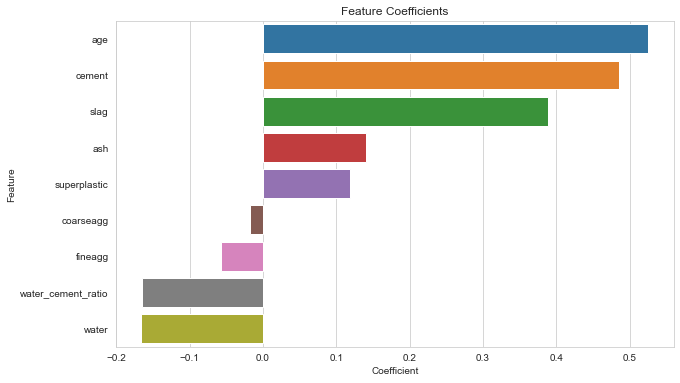

In [161]:
plot_bar_graph('Coefficient', 'Feature', sorted_lr_coef_df, 'Feature Coefficients')

**Observations**

- From the above plot, it is clear that age, cement, slag, water_cement_ratio and water features are the major contributors in predicting strength in Linear Regression model

## 4. Deliverable - 4 (Tuning the model) (20 marks)

In [162]:
copied_data_df = data_df.copy()
copied_data_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29


In [163]:
index = len(copied_data_df.columns) - 1
copied_data_df.insert(index, column_to_insert, copied_data_df['water']/copied_data_df['cement'])
copied_data_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,water_cement_ratio,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,1.440198,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,0.937241,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,0.749600,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,0.857143,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,1.248708,18.29


In [164]:
copied_data_df = copied_data_df.drop(columns_to_delete, axis=1)
copied_data_df.head()

,cement,slag,ash,water,superplastic,age,water_cement_ratio,strength
0,141.3,212.0,0.0,203.5,0.0,28.0,1.440198,29.89
1,168.9,42.2,124.3,158.3,10.8,14.0,0.937241,23.51
2,250.0,0.0,95.7,187.4,5.5,28.0,0.749600,29.22
3,266.0,114.0,0.0,228.0,0.0,28.0,0.857143,45.85
4,154.8,183.4,0.0,193.3,9.1,28.0,1.248708,18.29


In [165]:
columns = independent_features.copy()
columns.append(column_to_insert)
columns.remove('coarseagg')
columns.remove('fineagg')
columns

['cement', 'slag', 'ash', 'water', 'superplastic', 'age', 'water_cement_ratio']

In [166]:
X = copied_data_df[columns]

y = copied_data_df[dependent_feature]

X.head()

,cement,slag,ash,water,superplastic,age,water_cement_ratio
0,141.3,212.0,0.0,203.5,0.0,28.0,1.440198
1,168.9,42.2,124.3,158.3,10.8,14.0,0.937241
2,250.0,0.0,95.7,187.4,5.5,28.0,0.749600
3,266.0,114.0,0.0,228.0,0.0,28.0,0.857143
4,154.8,183.4,0.0,193.3,9.1,28.0,1.248708


In [167]:
y.head()

0    29.89
1    23.51
2    29.22
3    45.85
4    18.29
Name: strength, dtype: float64

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

X_train.shape

(721, 7)

In [169]:
y_train.shape

(721,)

In [170]:
X_test.shape

(309, 7)

In [171]:
y_test.shape

(309,)

### (b) Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit (5 marks)

In [125]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

### Common functions

In [126]:
cv_metrics = {
    'Model Name': [],
    'Train Score': [],
    'Test Score': []
}

def add_to_metrics(name, train_score, test_score, metrics):
    print(f'Model: {name}')
    print(f'  Train Score: {train_score}')
    print(f'  Test Score: {test_score}')
    
    if name in metrics['Model Name']:
        index = metrics['Model Name'].index(name)
        metrics['Train Score'][index] = train_score
        metrics['Test Score'][index] = test_score
    else:
        metrics['Model Name'].append(name)
        metrics['Train Score'].append(train_score)
        metrics['Test Score'].append(test_score)

def create_pipeline():
    scaler = StandardScaler()
    model = RandomForestRegressor()

    pipeline = Pipeline([('scaler', scaler), ('model', model)])
    return pipeline


def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('  Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('  Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

### Basic RandomForest with default parameters

In [127]:
basic_pipeline = create_pipeline()

basic_pipeline.fit(X_train, y_train)

train_score = basic_pipeline.score(X_train, y_train)
test_score = basic_pipeline.score(X_test, y_test)
add_to_metrics('Basic Random Forest', train_score, test_score, cv_metrics)

Model: Basic Random Forest
  Train Score: 0.9834522957381745
  Test Score: 0.8945541144017386


### Using RandomizedSearchCV

In [128]:
# Number of trees in random forest
n_estimators = [100, 200, 300, 400, 500, 1000]

# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2', None]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

criterion = ['mse', 'mae']

random_search_param_dist = {
    'model__n_estimators': n_estimators,
    'model__max_features': max_features,
    'model__max_depth': max_depth,
    'model__min_samples_split': min_samples_split,
    'model__min_samples_leaf': min_samples_leaf,
    'model__bootstrap': bootstrap,
    'model__criterion': criterion
}

In [129]:
pipeline = create_pipeline()
samples = 100

random_search_cv = RandomizedSearchCV(
    estimator=pipeline, param_distributions=random_search_param_dist, cv=3, n_iter=samples, 
    verbose=2, random_state=42, n_jobs=-1
)

random_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.0min finished


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('model',
                                              RandomForestRegressor())]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'model__bootstrap': [True, False],
                                        'model__criterion': ['mse', 'mae'],
                                        'model__max_depth': [10, 35, 60, 85,
                                                             110, None],
                                        'model__max_features': ['auto', 'sqrt',
                                                                'log2', None],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [100, 200, 300,
                                

In [130]:
random_search_cv.best_params_

{'model__n_estimators': 200,
 'model__min_samples_split': 2,
 'model__min_samples_leaf': 1,
 'model__max_features': None,
 'model__max_depth': 85,
 'model__criterion': 'mae',
 'model__bootstrap': True}

In [131]:
random_search_cv.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestRegressor(criterion='mae', max_depth=85,
                                       max_features=None, n_estimators=200))])

In [132]:
random_search_cv.best_score_

0.8896225413682518

In [133]:
train_score = random_search_cv.score(X_train, y_train)
test_score = random_search_cv.score(X_test, y_test)

add_to_metrics('Randomized Search - Random Forest', train_score, test_score, cv_metrics)

Model: Randomized Search - Random Forest
  Train Score: 0.9821368182806367
  Test Score: 0.90031866060298


### Using GridSearchCV

In [134]:
grid_search_param_grid = {
    'model__bootstrap': [True],
    'model__max_depth': [80, 85, 90, 95],
    'model__max_features': [None],
    'model__min_samples_leaf': [1, 2, 4],
    'model__min_samples_split': [2, 5, 10],
    'model__n_estimators': [100, 200, 300],
    'model__criterion': ['mse', 'mae']
}

In [135]:
pipeline = create_pipeline()

grid_search_cv = GridSearchCV(
    estimator=pipeline, param_grid=grid_search_param_grid, cv=5, verbose=2, n_jobs=-1
) 

grid_search_cv.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  6.1min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'model__bootstrap': [True],
                         'model__criterion': ['mse', 'mae'],
                         'model__max_depth': [80, 85, 90, 95],
                         'model__max_features': [None],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [100, 200, 300]},
             verbose=2)

In [136]:
grid_search_cv.best_params_

{'model__bootstrap': True,
 'model__criterion': 'mae',
 'model__max_depth': 85,
 'model__max_features': None,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__n_estimators': 100}

In [137]:
grid_search_cv.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestRegressor(criterion='mae', max_depth=85,
                                       max_features=None))])

In [138]:
grid_search_cv.best_score_

0.9018684433864014

In [139]:
train_score = grid_search_cv.score(X_train, y_train)
test_score = grid_search_cv.score(X_test, y_test)

add_to_metrics('Grid Search - Random Forest', train_score, test_score, cv_metrics)

Model: Grid Search - Random Forest
  Train Score: 0.9818199953451783
  Test Score: 0.8975431809306148


### Comparison

In [140]:
cv_metrics_df, sorted_cv_metrics_df = create_and_sort_df(cv_metrics, 'Test Score')
sorted_cv_metrics_df

,Model Name,Train Score,Test Score
1,Randomized Search - Random Forest,0.982137,0.900319
2,Grid Search - Random Forest,0.981820,0.897543
0,Basic Random Forest,0.983452,0.894554


### (c) Model performance range at 95% confidence level (10 marks)

In [141]:
copied_data_df = data_df.copy()
copied_data_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29


In [142]:
index = len(copied_data_df.columns) - 1
copied_data_df.insert(index, column_to_insert, copied_data_df['water']/copied_data_df['cement'])
copied_data_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,water_cement_ratio,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,1.440198,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,0.937241,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,0.749600,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,0.857143,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,1.248708,18.29


In [143]:
copied_data_df = copied_data_df.drop(columns_to_delete, axis=1)
copied_data_df.head()

,cement,slag,ash,water,superplastic,age,water_cement_ratio,strength
0,141.3,212.0,0.0,203.5,0.0,28.0,1.440198,29.89
1,168.9,42.2,124.3,158.3,10.8,14.0,0.937241,23.51
2,250.0,0.0,95.7,187.4,5.5,28.0,0.749600,29.22
3,266.0,114.0,0.0,228.0,0.0,28.0,0.857143,45.85
4,154.8,183.4,0.0,193.3,9.1,28.0,1.248708,18.29


In [144]:
scaled_data_df = get_scaled_df(copied_data_df)
scaled_data_df.head()

,cement,slag,ash,water,superplastic,age,water_cement_ratio,strength
0,-1.339017,1.625292,-0.847144,1.062459,-1.090842,-0.188562,2.212075,-0.355018
1,-1.074790,-0.365026,1.096078,-1.132696,0.881980,-0.689672,0.603159,-0.737108
2,-0.298384,-0.859675,0.648965,0.280557,-0.086164,-0.188562,0.002911,-0.395144
3,-0.145209,0.476581,-0.847144,2.252311,-1.090842,-0.188562,0.346932,0.600806
4,-1.209776,1.290056,-0.847144,0.567092,0.571443,-0.188562,1.599514,-1.049727


In [145]:
values = scaled_data_df.to_numpy()
values

array([[-1.33901711,  1.62529159, -0.84714393, ..., -0.18856168,
         2.21207481, -0.35501811],
       [-1.07479007, -0.36502569,  1.09607803, ..., -0.68967232,
         0.60315855, -0.73710825],
       [-0.29838379, -0.85967463,  0.64896501, ..., -0.18856168,
         0.00291142, -0.39514356],
       ...,
       [-0.04564488,  0.50002387,  0.56454507, ..., -0.18856168,
        -0.31639472,  0.50678082],
       [ 0.58237302, -0.41425616, -0.84714393, ...,  0.44363005,
        -0.26238509,  1.15238141],
       [ 2.47791487, -0.85967463, -0.84714393, ..., -0.94022764,
        -1.3701568 ,  1.005654  ]])

In [146]:
from sklearn.utils import resample

n_iterations = 1000                        # Number of bootstrap samples to create
n_size = int(len(scaled_data_df) * 1)      # picking only 70 % of the given data in every bootstrap sample
values = scaled_data_df.to_numpy()

scores = {
    'train_score': [],
    'test_score': []
}

for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    X_train = train[:, :-1]
    y_train = train[:, -1]
    
    X_test = test[:, :-1]
    y_test = test[:, -1]
    
    # fit model
#     model = SVR()
#     model = LinearRegression()
#     model = DecisionTreeRegressor(max_depth=7, random_state=0)
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    
    # evaluate model
    # y_pred = model.predict(X_test)

    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    scores['train_score'].append(train_score)
    scores['test_score'].append(test_score)

In [147]:
scores_df = pd.DataFrame(scores)
scores_df.head()

,train_score,test_score
0,0.990046,0.883667
1,0.992407,0.861844
2,0.993330,0.851676
3,0.991710,0.885405
4,0.992902,0.880150


In [148]:
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   train_score  1000 non-null   float64
 1   test_score   1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [149]:
scores_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
train_score,1000.0,0.990698,0.002195,0.982889,0.989236,0.990778,0.992537,0.995144
test_score,1000.0,0.887071,0.014899,0.833950,0.877845,0.887951,0.897835,0.925802


95.0 confidence interval 85.4% and 91.3%


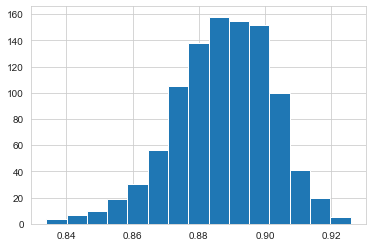

In [150]:
# plot scores
plt.hist(scores_df['test_score'], bins=15)

# confidence intervals
alpha = 0.95                             # for 95% confidence 

p = ((1.0 - alpha) / 2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(scores_df['test_score'], p))  

p = (alpha + ((1.0 - alpha) / 2.0)) * 100
upper = min(1.0, np.percentile(scores_df['test_score'], p))

print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))